###### Dataset from [Kaggle](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction "Travel Package")

# 1. Exploratory Data Analysis

## Import Libraries and Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import shap
import scikitplot as skplt

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and read dataset
df = pd.read_csv('dataset/Travel.csv')

# View info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

From info above, 
- The data consists of 4888 rows and 20 columns (14 numeric columns and 6 categorical columns).
- It show that several columns have null/missing values ​​(non-null count < total rows).
- The name and data types of each columns seems matching.

In [3]:
# View 5 rows from top
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Description

- **CustomerID** : Unique customer ID
- **ProdTaken** : Product taken or not (0: No, 1: Yes)
- **Age** : Age of customer
- **TypeofContact** : How customer was contacted (Company Invited or Self Inquiry)
- **CityTier** : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
- **DurationOfPitch** : Duration of the pitch by a salesperson to the customer
- **Occupation** : Occupation of customer
- **Gender** : Gender of customer
- **NumberOfPersonVisiting** : Total number of persons planning to take the trip with the customer
- **NumberOfFollowups** : Total number of follow-ups has been done by the salesperson after the sales pitch
- **ProductPitched** : Product pitched by the salesperson
- **PreferredPropertyStar** : Preferred hotel property rating by customer
- **MaritalStatus** : Marital status of customer
- **NumberOfTrips** : Average number of trips in a year by customer
- **Passport** : The customer has a passport or not (0: No, 1: Yes)
- **PitchSatisfactionScore** : Sales pitch satisfaction score
- **OwnCar** : Whether the customers own a car or not (0: No, 1: Yes)
- **NumberOfChildrenVisiting** : Total number of children with age less than 5 planning to take the trip with the customer
- **Designation** : Designation of the customer in the current organization
- **MonthlyIncome** : Gross monthly income of the customer

In [4]:
# View 5 random rows
df.sample(5, random_state=40)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
141,200141,0,NaN,Self Enquiry,1,35.0,Small Business,Male,2,3.0,Basic,3.0,Single,6.0,0,2,1,0.0,Executive,18452.0
3894,203894,0,36.0,Self Enquiry,2,33.0,Salaried,Fe Male,3,4.0,Standard,3.0,Unmarried,3.0,1,1,1,1.0,Senior Manager,27515.0
1663,201663,0,43.0,Company Invited,1,13.0,Small Business,Male,2,1.0,Basic,3.0,Married,5.0,0,4,1,0.0,Executive,17089.0
2098,202098,0,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
4733,204733,0,29.0,Self Enquiry,1,9.0,Salaried,Male,4,5.0,Basic,4.0,Married,2.0,0,1,0,3.0,Executive,21879.0


In [ ]:
# Show unique values 
print(df['Gender'].unique())

print(df['MaritalStatus'].unique())

['Female' 'Male' 'Fe Male']
['Single' 'Divorced' 'Married' 'Unmarried']


Based on the 5 data samples, it is known that:
- The value of the `Gender` column contain a mistake in writing **Fe Male** which should be **Female**.
- The value of the `MaritalStatus` column there is a marital status **Single**, we can consider it as **Unmarried**.
- For other columns, there is no mistake.

## Descriptive Statistics

In [6]:
# Statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


From the statistics of numerical columns, it can be concluded that:
- It show that several columns have null/missing values ​​(count < total rows), which is `Age`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, and `MonthlyIncome`.
- There is an outlier on `DurationOfPitch` and `NumberOfTrips` column, because it has a max value that is very far from the Q3 value.
- There is an outlier on `MonthlyIncome` column, because it has a mean value that is higher than median values.
- For other columns, perhaps it approaches a normal distribution.

In [7]:
# Statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


From the statistics of categorical columns, it can be concluded that: 
- `TypeofContact` column has a null/missing values (count < total rows).
- There are some values that have a proportion or frequency more than 50% of the number of rows on data, which is *Self Enquiry*  on `TypeofContact` column and *Male* on `Gender`.

In [8]:
# Proportion of count data on categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

TypeofContact
Self Enquiry       70.820481
Company Invited    29.179519
Name: proportion, dtype: float64
---------------------------
Occupation
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: proportion, dtype: float64
---------------------------
Gender
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: proportion, dtype: float64
---------------------------
ProductPitched
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: proportion, dtype: float64
---------------------------
MaritalStatus
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: proportion, dtype: float64
---------------------------
Designation
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: proportion, dtype: fl

In [9]:
# Check duplicate rows
duplicate_rows = df.drop('CustomerID', axis=1).duplicated().sum()
print('Of the entire rows, have been found {} rows duplicated data'. format(duplicate_rows))

Of the entire rows, have been found 141 rows duplicated data


In [10]:
# Split and define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical columns : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


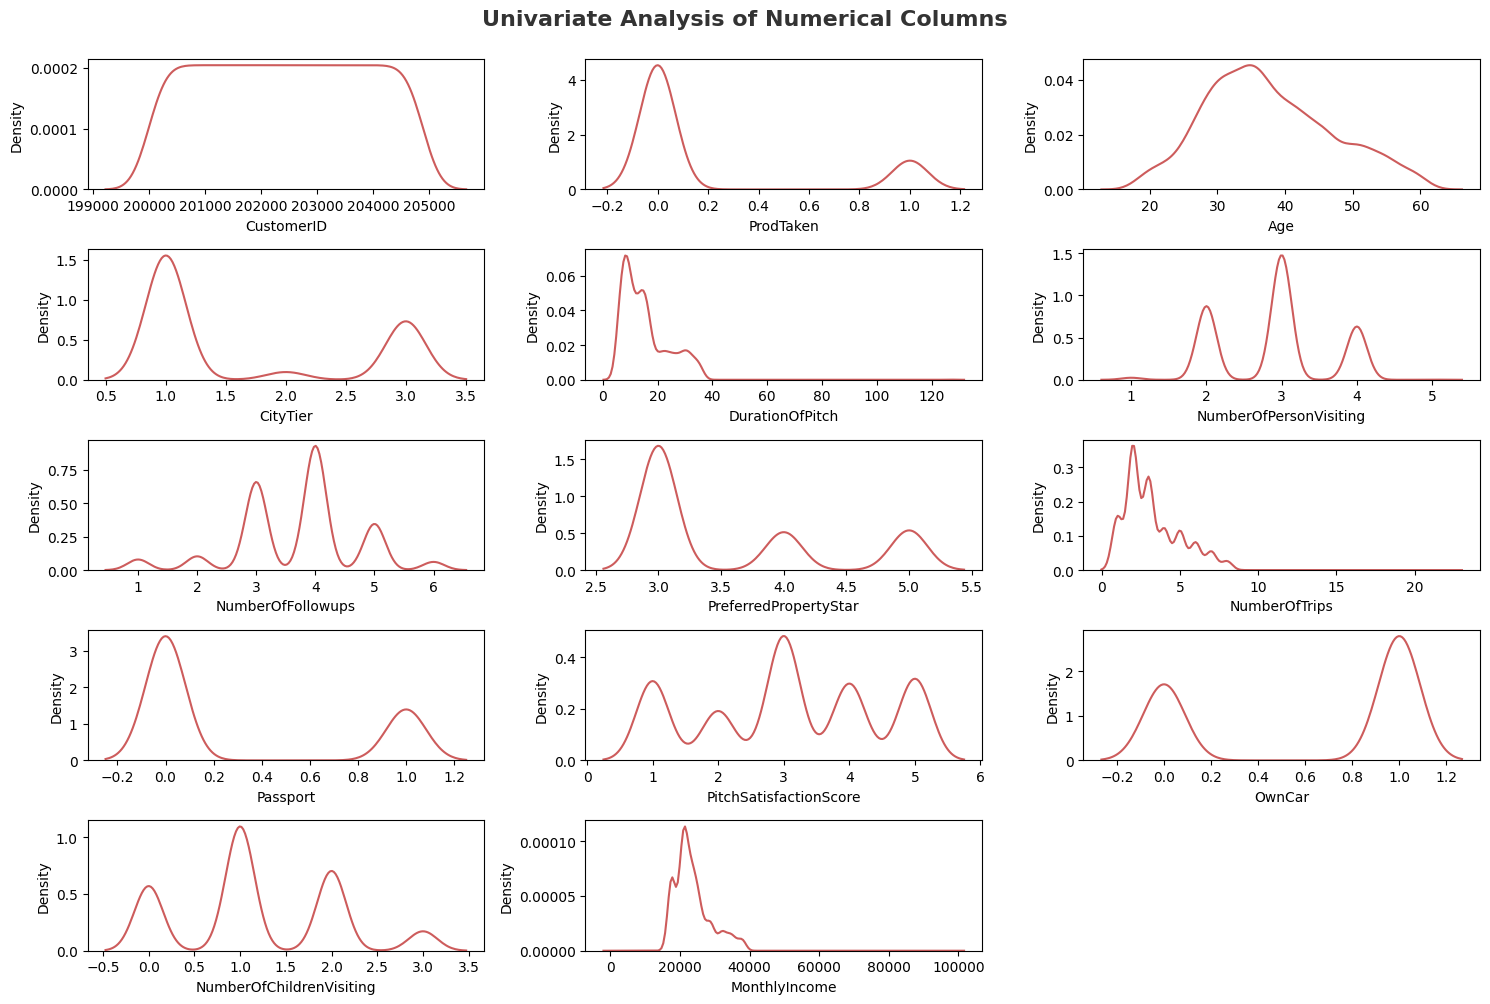

In [11]:
# Numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    
# Save plot
plt.savefig('img/num_univariative.png')

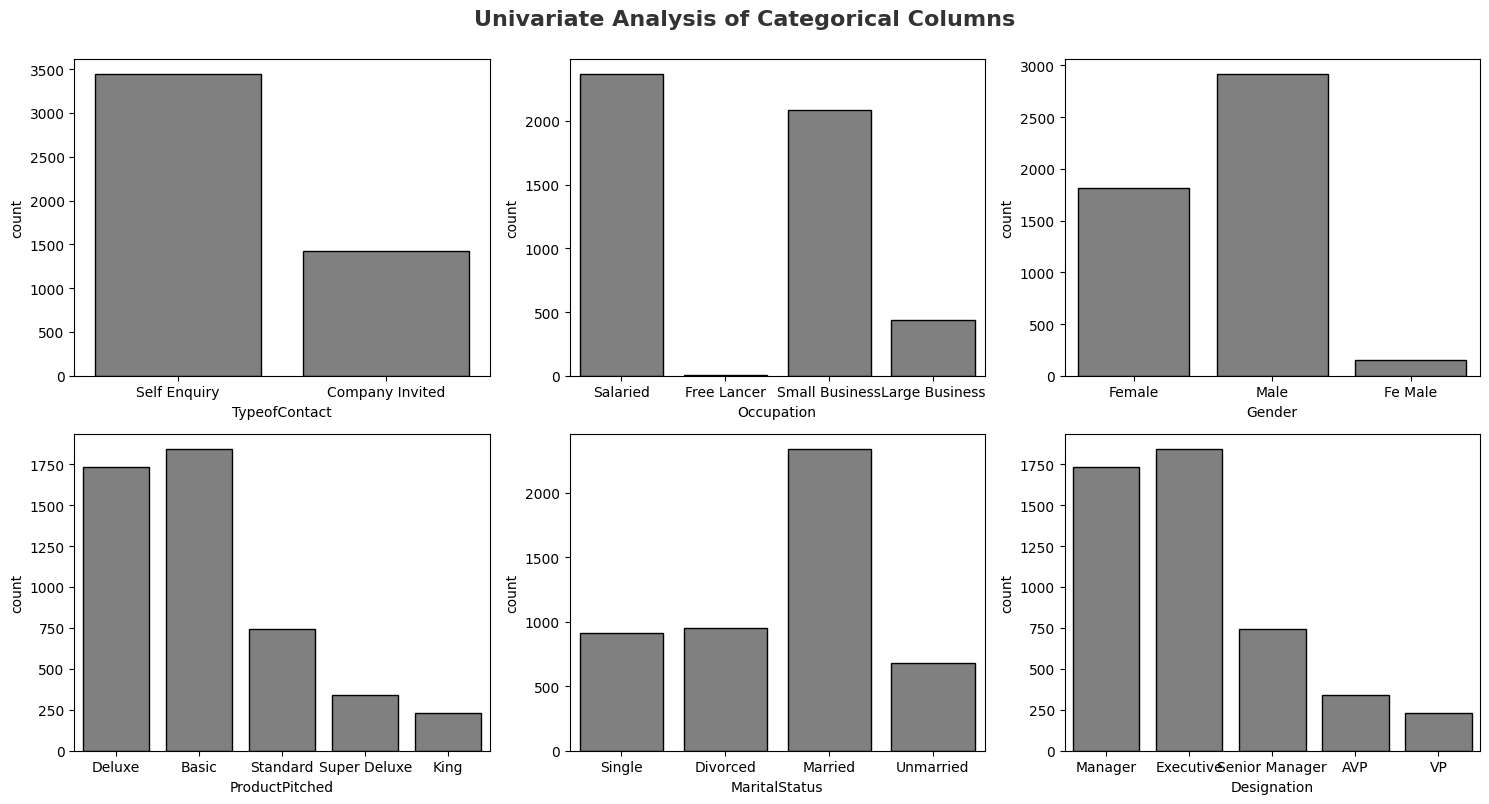

In [12]:
# Categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='grey', edgecolor='black')
    plt.tight_layout()
    
# Save plot
plt.savefig('img/cat_univariate.png')

From the visualization results above, it can be concluded that:
- `TypeofContact` column is dominated (data proportion more than 50%) by *Self Inquiry*.
- `Occupation` column is dominated by *Salaried* and *Small Business*, but the number of *Free Lancers* is too small so they can be deleted later.
- On `Gender` column there are more males than females. Beside that, there was an error in writing the Fe Male category which should have been Female.
- `ProductPitched` and `Designation` columns are dominated by 2 categories.
- `MaritalStatus` column is dominated by Married status. Then the status Single and Unmarried can be consider as the same so they can be combined.

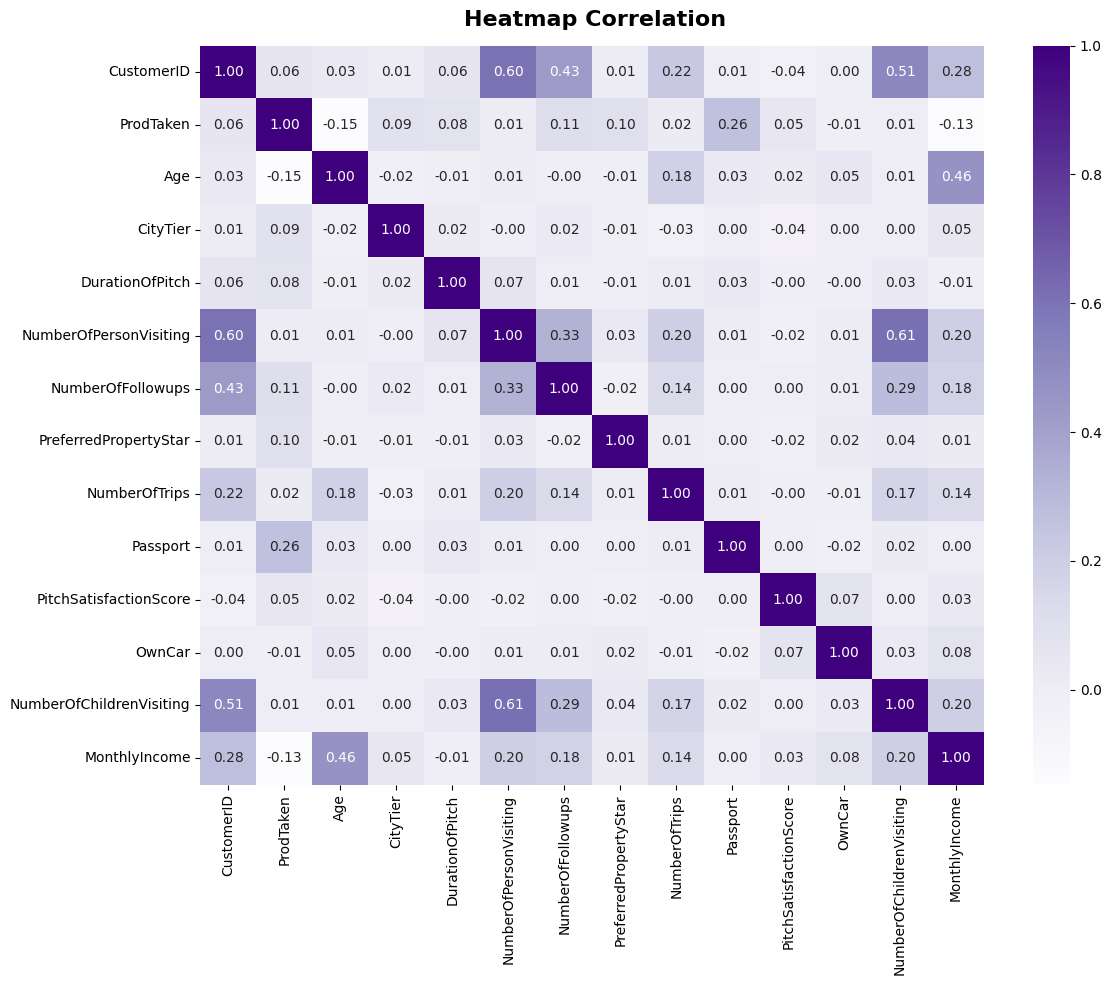

In [13]:
# Heatmap Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Purples')
plt.suptitle('Heatmap Correlation', color='black', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Save plot
plt.savefig('img/heatmap.png')

From the heatmap correlation result, it is known that:
- The target, `ProdTaken` column has a weak negative correlation to `Age` and `MontlyIncome`.
- `NumberOfFollowups` and `Passport` columns also have a weak positive correlation to `ProdTaken`.
- `NumberOfPersonVisiting` and `NumberOfChildrenVisiting` columns have a strong enough positive correlation that they can be combined into a new column feature.

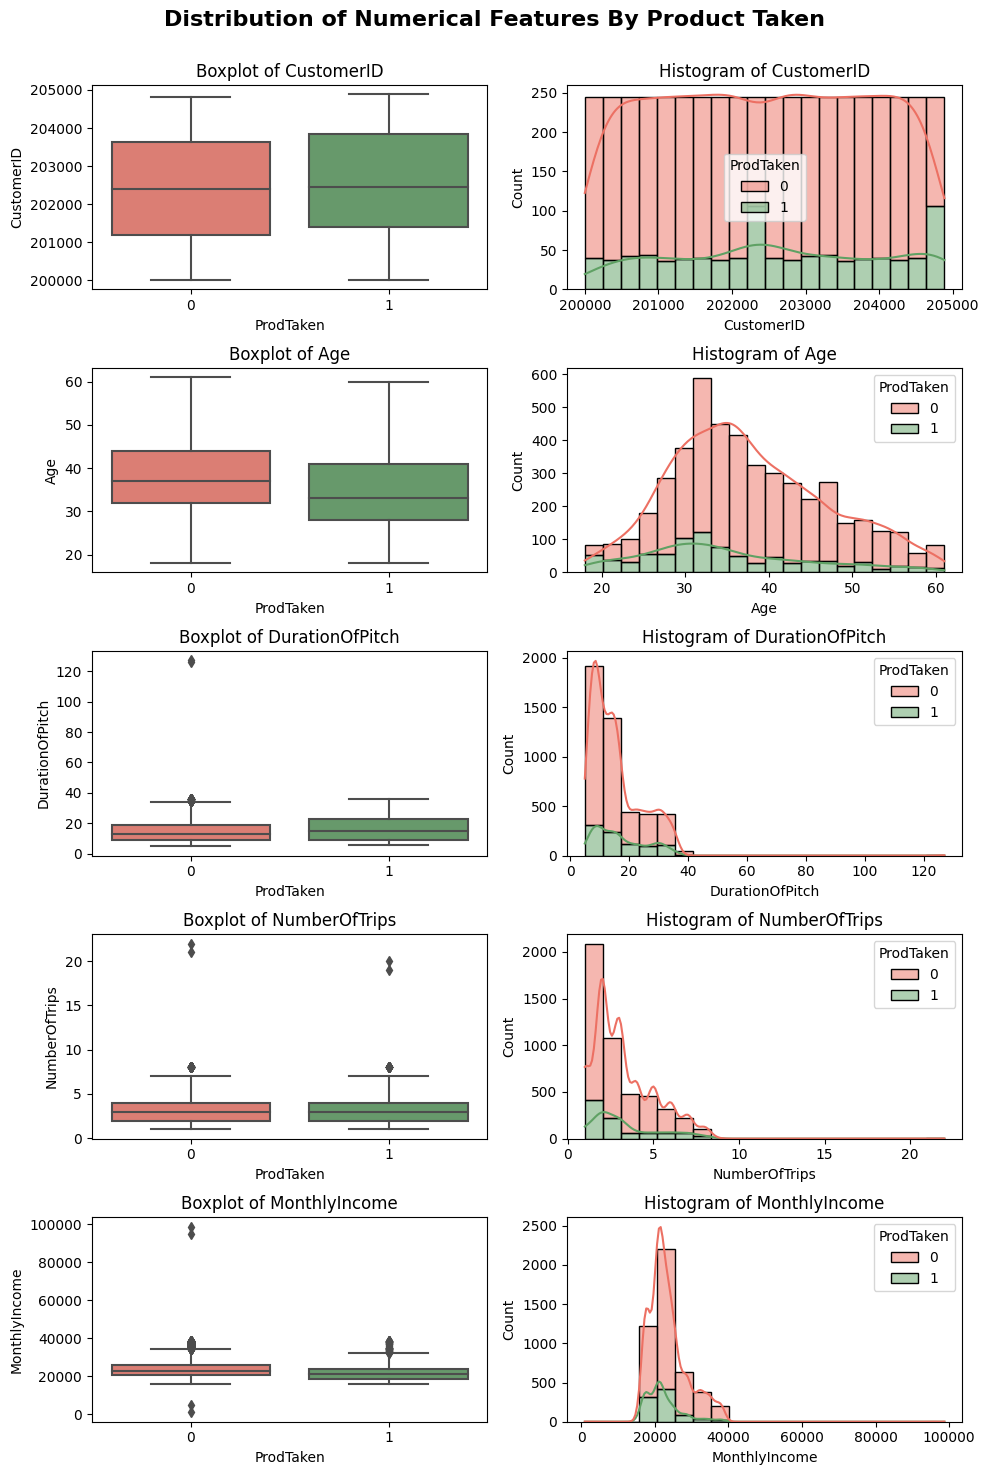

In [14]:
# EDA Numerical Features by Target (ProdTaken)
num_cols2 = ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#EC7063', '#5FA164']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='black',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='ProdTaken', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

# Save plot
plt.savefig('img/num_multivariate.png')

From the results of the visualization, it can be concluded that:
- `CustomerID` column can be ignore as feature, because it have a unique values for each rows.
- Customers who bought travel packages are mostly `age` 20-35.
- `DurationOfPitch` by sales that under 20 minutes, can potentially persuade customers to buy travel packages.
- The `NumberOfTrips` most customers have taken is no more than 5 trips in a year.
- Customers with `MonthlyIncome` ranging from 150000-250000 may be more interested to buying travel packages.

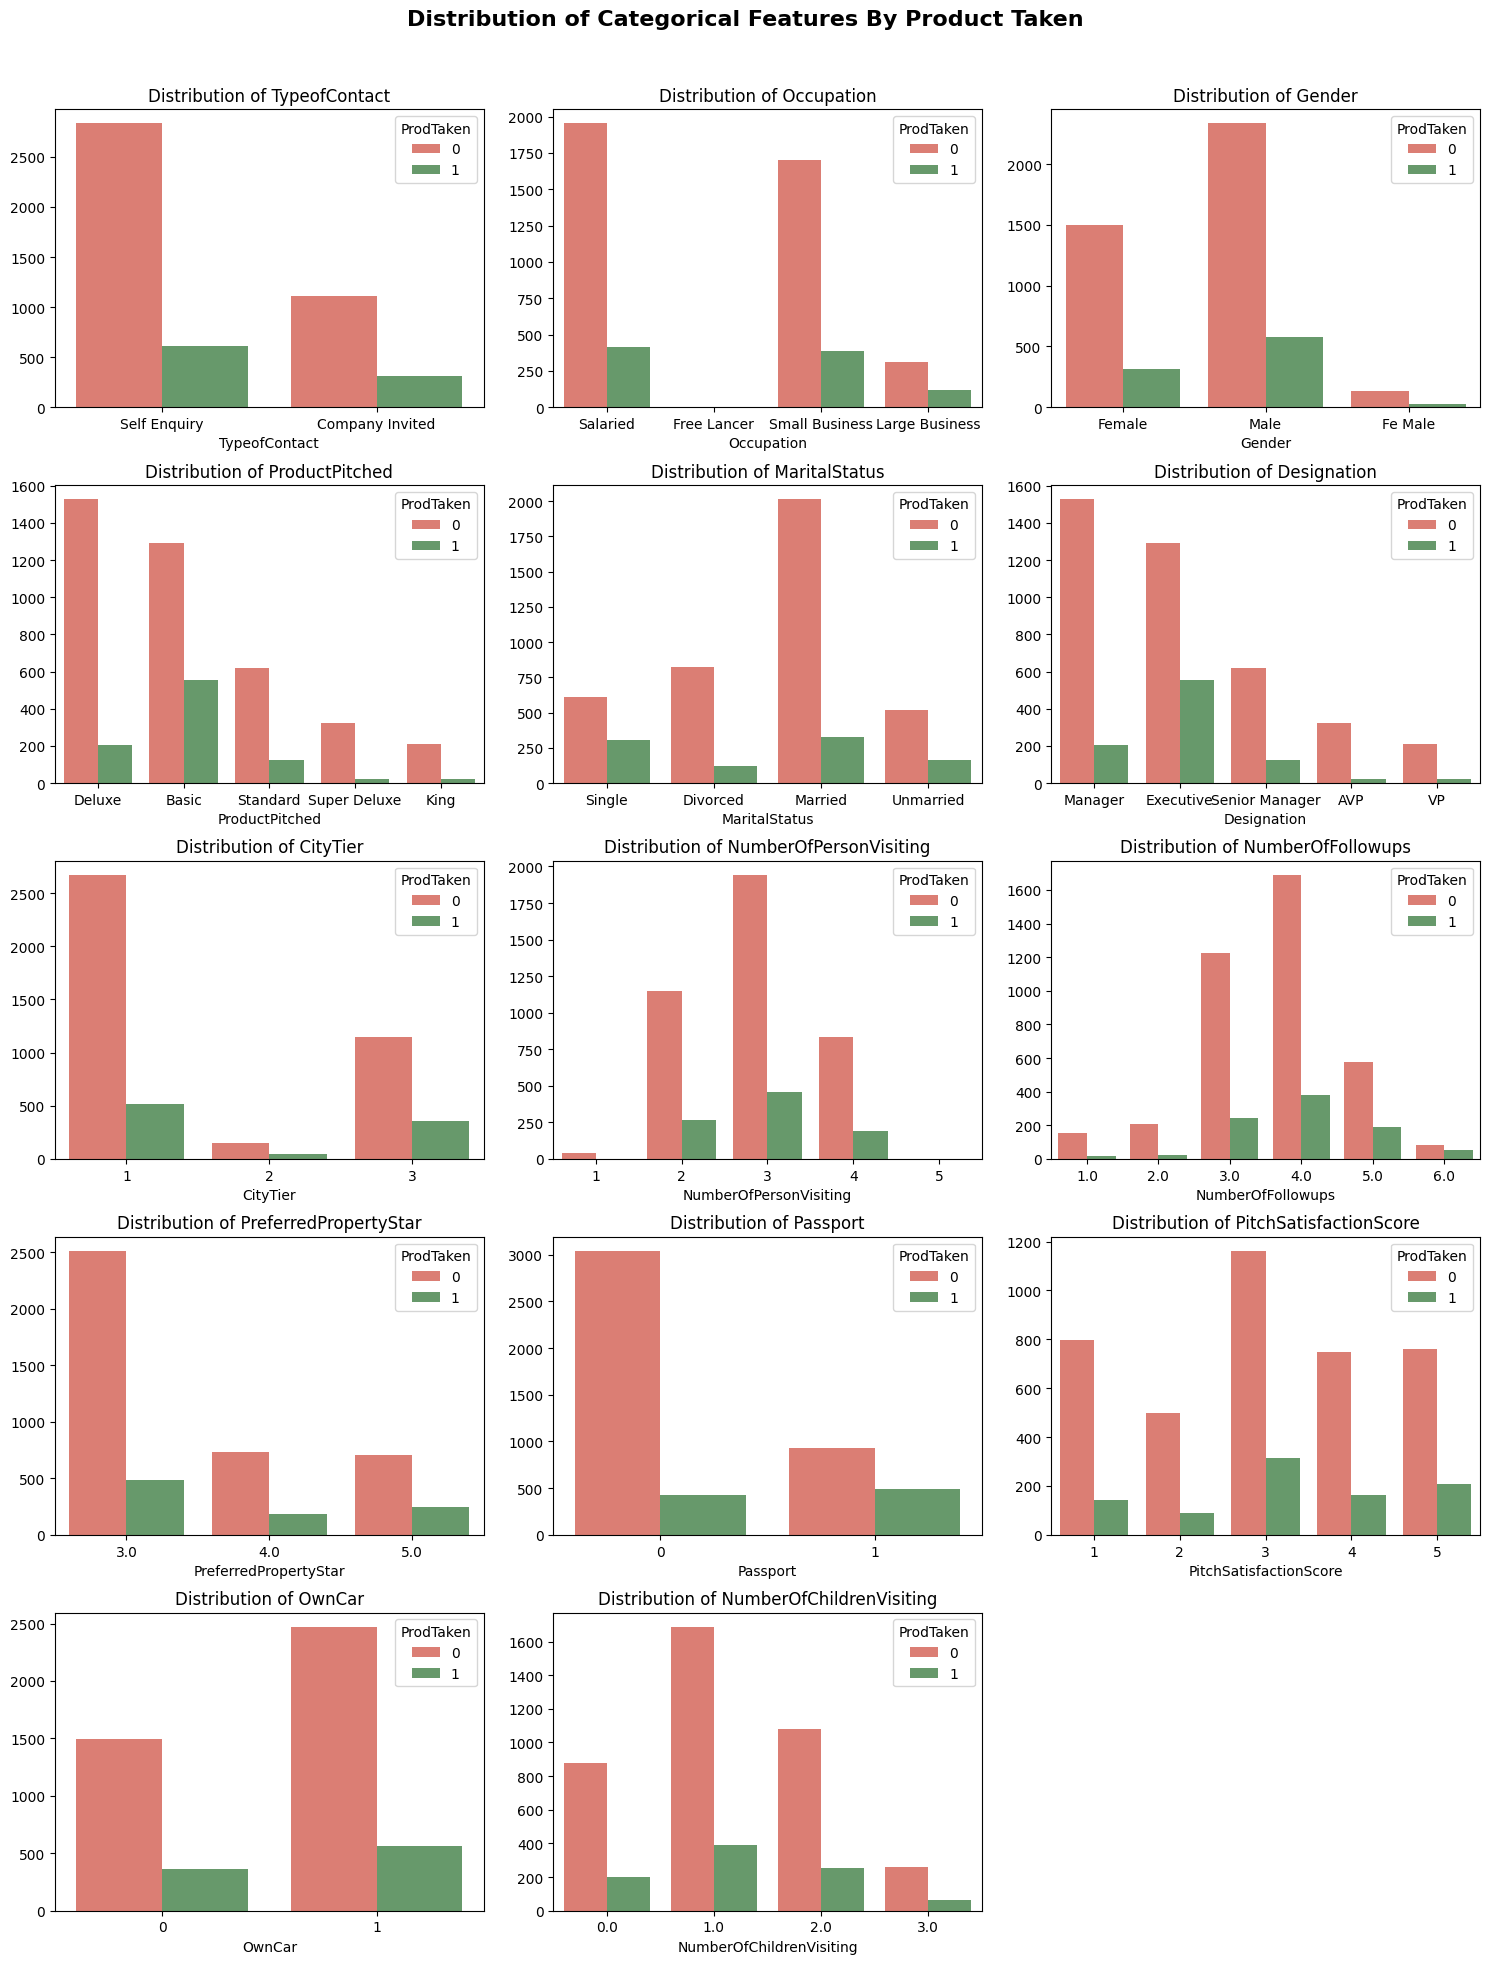

In [15]:
# EDA Categorical Features by Target (ProdTaken)
cat_cols2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
clr2 = ['#EC7063', '#5FA164']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Product Taken', color='black',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='ProdTaken', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

# Save plot
plt.savefig('img/cat_multivariate_analysis.png')

From the results of the visualization, it can be concluded that:
- Customers with the Self Inquiry contact type are more likely to purchase travel packages than Company Invited.
- Customers with Occupation Salaried and Small Business are more interested in buying travel packages, and Free Lancers are definitely buying travel packages.
- Male customers buy more travel packages than women.
- The basic type that offered by sales are the most sold product.
- Married, single or unmarried customers are more likely to buy travel packages.
- Travel Packages that offered to ececutive are more purchased.
- Customers who lives in city iter 1 and 3 are more interested to buy travel packages.
- The number of people who will travel with 2-4 person are more buying travel packages.
- Customers who are followed up >=3 times after pitching buy more travel packages.
- Customers who give a rating of 3 to hotel properties that will be used during their holidays buy more travel packages.
- Customers who have passports are slightly more likely to buy travel packages.
- Customers who give a satisfaction score >=3 buy more travel packages.
- Customers who own cars, buy more travel packages.
- Customers with children under 5 years are 1 or 2 more likely to buy travel packages.

In [16]:
# check correlation categorical columns to target
# H0 (Fail to Reject Null) : Categorical columns does not have correlation with target (ProdTaken)
# H1 (Reject Null): Categorical columns have correlation with target (ProdTaken)

from scipy.stats import chi2_contingency
chi2_check = []
for i in cat_cols:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis


From the test results, it can be concluded that:
- `Gender` column may not be included as a feature, because it Fails to Reject Null Hypothesis(the column is not correlated with the target).
- For `TypeofContact`, `Occupation`, `ProductPitched`, `MaritalStatus`, and `Designation` columns can be included as a feature, because it Reject Null Hypotesis(the column is correlated with the target).

In [17]:
# Check proportion target
prop_target = df['ProdTaken'].value_counts(normalize=True) * 100
print('Percentage of customer who did not buy travel package is {}%'.format(round(prop_target[0], 1)))
print('Percentage of customer who buy travel package is {}%'.format(round(prop_target[1], 1)))

Percentage of customer who did not buy travel package is 81.2%
Percentage of customer who buy travel package is 18.8%


## EDA Conclusion

From Exploratory Data Analysis that has been done, it can concluded that:
1. The columns name and data types are match, but there are mistake in `Gender` column and the same meaning of data in the `Marital Status` column.
2. There are *missing values* in `Age`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, `MonthlyIncome`, and `TypeofContact` column.
3. There is an outliers in `DurationOfPitch`, `NumberOfTrips`, and `MonthlyIncome` column.
4. There is a duplicated data.
5. `CustomerID` column can be drop or deleted because it have a unique values for each rows.
6. `ProdTaken` column is the target to proceed.
7. Numerical columns that appear to have a correlation to the target can be used as features, which is `Age`, `MontlyIncome`, `NumberOfFollowups` and `Passport`.
8. `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` column has a strong enough positive correlation that it can be combined to become a new feature (`TotalVisiting`).
9. Some numeric columns show have no correlation to the target `ProdTaken` can be drop or deleted.
10. In the categorical column, features can be add, which is `TypeofContact`, `Occupation`, `ProductPitched`, `MaritalStatus`, and `Designation` because based on the results of hypothesis testing using chi-square it succeeded in rejecting H0 (it is correlated with the target).

# 2. Business Insights

In [18]:
# Copy dataframe
df2 = df.copy()

### Which products make customers interested to purchase?

In [19]:
df_product = df2.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df2.groupby(['ProductPitched'])['CustomerID'].count(),on = 'ProductPitched')
df_product = df_product[df_product.ProdTaken==1].reset_index(drop=True)
df_product['%']=round(df_product.TotalCust/df_product.CustomerID*100,2)
df_product = df_product.sort_values(by='%',ascending=False)
df_product

,ProductPitched,ProdTaken,TotalCust,CustomerID,%
0,Basic,1,552,1842,29.97
3,Standard,1,124,742,16.71
1,Deluxe,1,204,1732,11.78
2,King,1,20,230,8.70
4,Super Deluxe,1,20,342,5.85


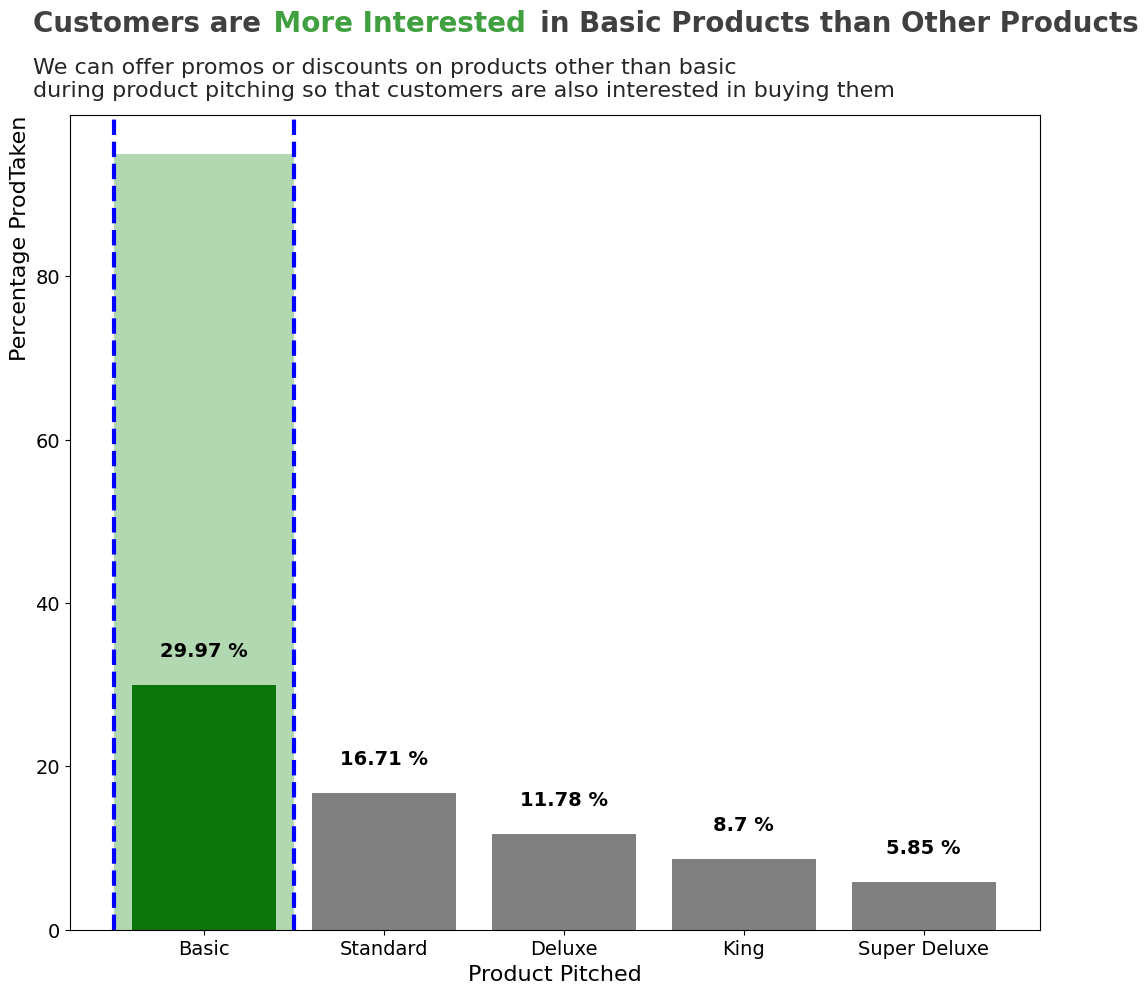

In [20]:
plt.figure(figsize=(12,10))

sns.barplot( x='ProductPitched',y='%',data=df_product, palette=['grey'])
sns.barplot( x='ProductPitched',y=[29.97,0,0,0,0],data=df_product, palette=['g'])

plt.xlabel('Product Pitched', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=-0.5, color='blue', linestyle='dashed', linewidth=3)
plt.axvline(x=0.5, color='blue', linestyle='dashed', linewidth=3)
plt.stackplot(np.arange(-0.5, 1.5 ,1), [[95]], colors='g', alpha=0.3)

data_bars = df_product.sort_values('%',ascending=False)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='black', alpha=1, va='bottom', ha='center')
plt.text(s='Customers are                             in Basic Products than Other Products', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                         More Interested',c='g', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='We can offer promos or discounts on products other than basic\nduring product pitching so that customers are also interested in buying them',
        x=-0.95, y=102, fontsize=16, alpha =.85)


plt.tight_layout()

# Save plot
plt.savefig('img/insight1.png')
plt.show()


### Does the number of follow ups from sales influence customers to buy travel packages?

In [21]:
followup_total = pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken']).stack().reset_index(name='TotalCust')
followup_perc = round(pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken'], normalize='index')*100, 2)
followup_perc = followup_perc.stack().reset_index(name='PercCust')

df_followups = followup_total.merge(followup_perc, on=['NumberOfFollowups', 'ProdTaken'])
df_followups = df_followups[df_followups.ProdTaken==1].reset_index(drop=True)
df_followups

,NumberOfFollowups,ProdTaken,TotalCust,PercCust
0,1.0,1,20,11.36
1,2.0,1,24,10.48
2,3.0,1,244,16.64
3,4.0,1,379,18.33
4,5.0,1,191,24.87
5,6.0,1,54,39.71


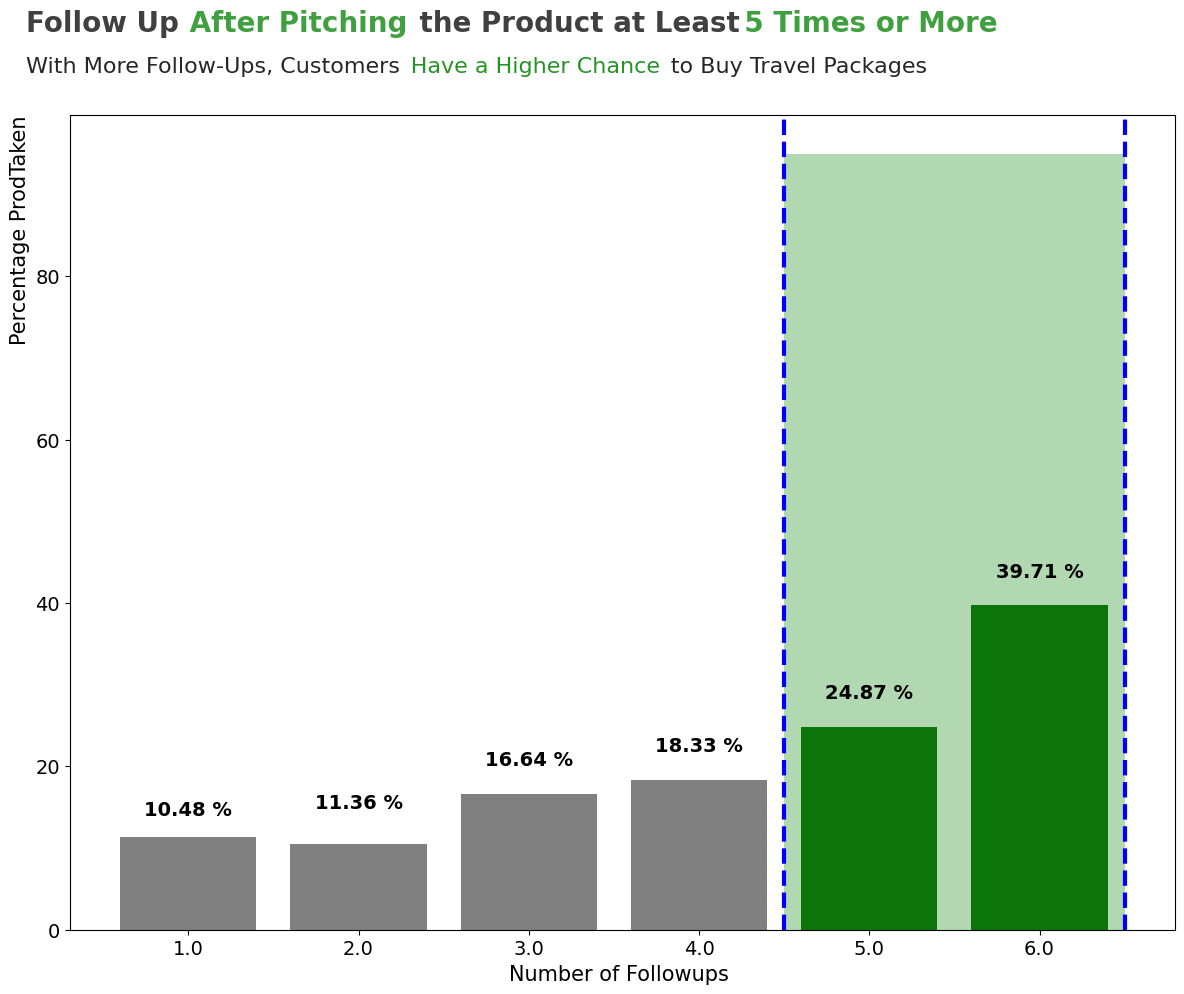

In [22]:
plt.figure(figsize=(12,10))

sns.barplot( x='NumberOfFollowups',y='PercCust',data=df_followups, palette=['grey'])
sns.barplot( x='NumberOfFollowups',y=[0,0,0,0,24.87,39.71],data=df_followups, palette=['green'])
plt.xlabel('Number of Followups ', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=3.5, color='blue', linestyle='dashed', linewidth=3)
plt.axvline(x=5.5, color='blue', linestyle='dashed', linewidth=3)
plt.stackplot(np.arange(3.5, 6,0.5 ), [[95]], colors='green', alpha=0.3)

data_bars = df_followups.sort_values('PercCust',ascending=True)['PercCust'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='black', alpha=1, va='bottom', ha='center')
plt.text(s='Follow Up                         the Product at Least', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                 After Pitching                                   5 Times or More', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75,c='g')
plt.text(s='With More Follow-Ups, Customers                                      to Buy Travel Packages',
        x=-0.95, y=105, fontsize=16, alpha =.85)
plt.text(s='                                                      Have a Higher Chance',
        x=-0.95, y=105, fontsize=16, alpha =.85,c='g')

plt.tight_layout()

# Save plot
plt.savefig('img/insight2.png')
plt.show()


### Which age group buys more travel packages?

In [23]:
print('Age data is start from {} to {}'.format(int(df2['Age'].min()), int(df2['Age'].max())))

Age data is start from 18 to 61


According to [Statistics Canada](https://www.statcan.gc.ca/en/concepts/definitions/age2 "Age Grouping") 
- Youth : 15 - 24 
- Adult : 25 - 44 
- Elderly : 45 - 60

In [24]:
def age_group(x):
    if x>=18 and x<=25:
        return 'Youth'
    elif x<=45:
        return 'Adult'
    else:
        return 'Elderly'
    
df2['AgeGroup'] = df2['Age'].apply(lambda x : age_group(x))
age_group = df2.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
             .merge(df2.groupby(['AgeGroup'])['CustomerID'].count().reset_index(name='TotalCust'),on='AgeGroup')

df_product = df_product.sort_values(by='%',ascending=False)
age_group['%']= round(age_group.TotalCust_x/age_group.TotalCust_y*100,2)
age_group = age_group[age_group.ProdTaken==1].sort_values('%',ascending=False).reset_index(drop=True)
age_group

,AgeGroup,ProdTaken,TotalCust_x,TotalCust_y,%
0,Youth,1,143,347,41.21
1,Adult,1,589,3341,17.63
2,Elderly,1,188,1200,15.67


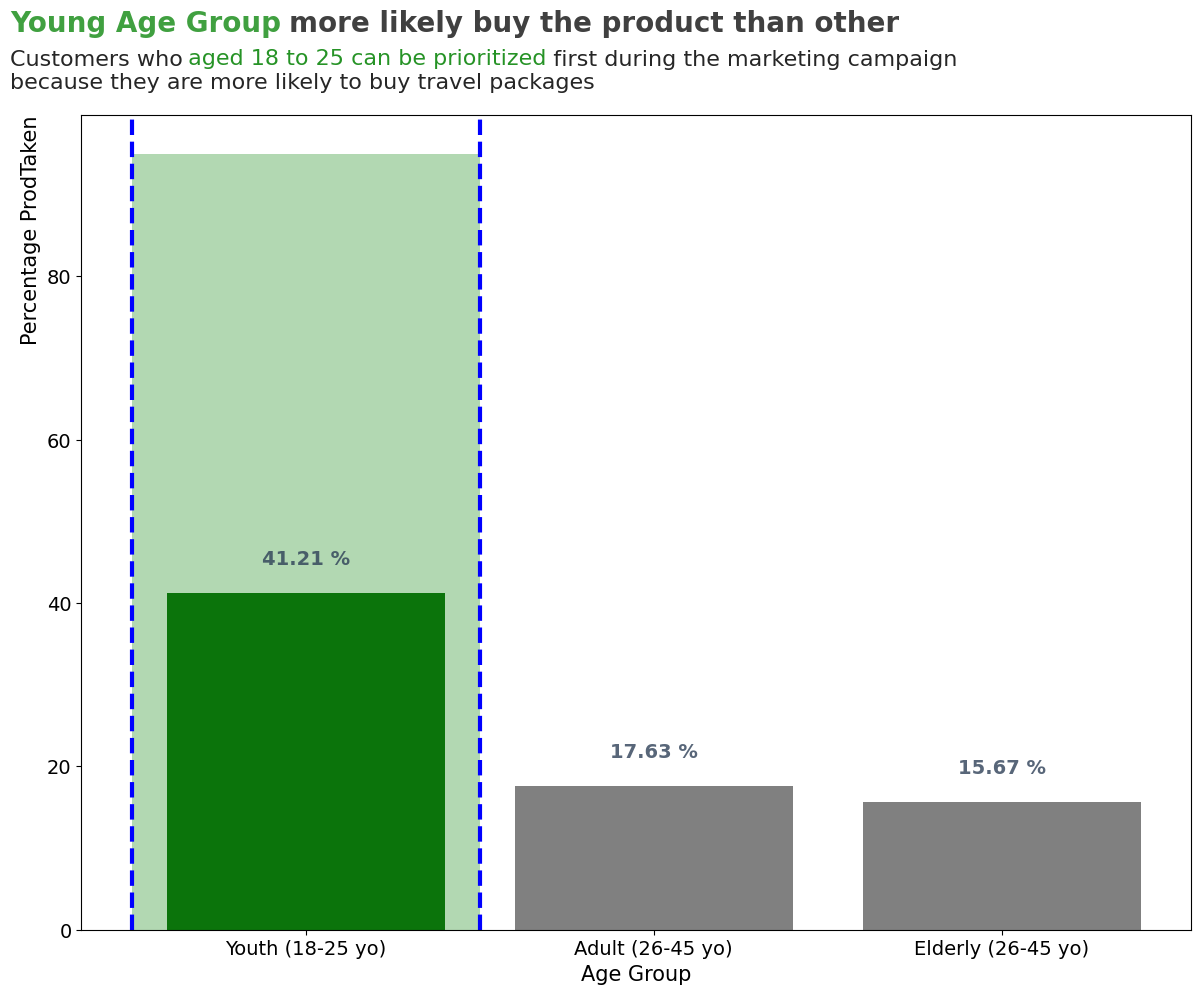

In [25]:
plt.figure(figsize=(12,10))

sns.barplot( x='AgeGroup',y='%',data=age_group, palette=['grey'])
sns.barplot( x='AgeGroup',y=[41.21,0,0],data=age_group, palette=['g'])

plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks([0,1,2],['Youth (18-25 yo)','Adult (26-45 yo)','Elderly (26-45 yo)'],size=14)


plt.axvline(x=-0.5, color='blue', linestyle='dashed', linewidth=3)
plt.axvline(x=0.5, color='blue', linestyle='dashed', linewidth=3)
plt.stackplot(np.arange(-0.5, 0.6,0.5 ), [[95]], colors='green', alpha=0.3)

data_bars = age_group.sort_values('%',ascending=False)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s="                             more likely buy the product than other", 
        x=-0.85, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s="Young Age Group ", 
        x=-0.85, y=110, fontsize=20, fontweight='bold', alpha =.75, c='g')
plt.text(s='Customers who                                                    first during the marketing campaign\nbecause they are more likely to buy travel packages',
        x=-0.85, y=103, fontsize=16, alpha =.85)
plt.text(s='                         aged 18 to 25 can be prioritized',
        x=-0.85, y=106, fontsize=16, alpha =.85, c='g')
legend_labels, _= ax.get_legend_handles_labels()

plt.tight_layout()

# Save plot
plt.savefig('img/insight3.png')
plt.show()


### Does the longer duration of pitch and number of follow ups from sales influence customers to buy new travel packages?

In [26]:
df2.drop_duplicates(inplace=True)

In [27]:
_all = df2.groupby('DurationOfPitch')[['ProdTaken']].count()
yes = df2[df2['ProdTaken']==1].groupby('DurationOfPitch')[['ProdTaken']].count()
all = yes.merge(_all,on='DurationOfPitch',how='left')
all['%']=round((all['ProdTaken_x']*100/all['ProdTaken_y']),2)
all.reset_index(inplace=True)#
# sum.sort_values(by='%',ascending=False,inplace=True)
all = all.head(30)
all.iloc[13:26]

,DurationOfPitch,ProdTaken_x,ProdTaken_y,%
13,19.0,21,57,36.84
14,20.0,19,65,29.23
15,21.0,16,73,21.92
16,22.0,23,89,25.84
17,23.0,21,79,26.58
18,24.0,16,70,22.86
19,25.0,14,73,19.18
20,26.0,12,72,16.67
21,27.0,14,72,19.44
22,28.0,17,61,27.87


In [28]:
f_all = df2.groupby('NumberOfFollowups')[['ProdTaken']].count()
f_yes = df2[df2['ProdTaken']==1].groupby('NumberOfFollowups')[['ProdTaken']].count()
f_aall = f_yes.merge(f_all,on='NumberOfFollowups',how='left')
f_aall['%']=round((f_aall['ProdTaken_x']*100/f_aall['ProdTaken_y']),2)
f_aall.reset_index(inplace=True)#
f_aall.sort_values(by='%',ascending=False,inplace=True)
f_aall

,NumberOfFollowups,ProdTaken_x,ProdTaken_y,%
5,6.0,54,136,39.71
4,5.0,191,768,24.87
3,4.0,379,2068,18.33
2,3.0,244,1466,16.64
0,1.0,20,176,11.36
1,2.0,24,229,10.48


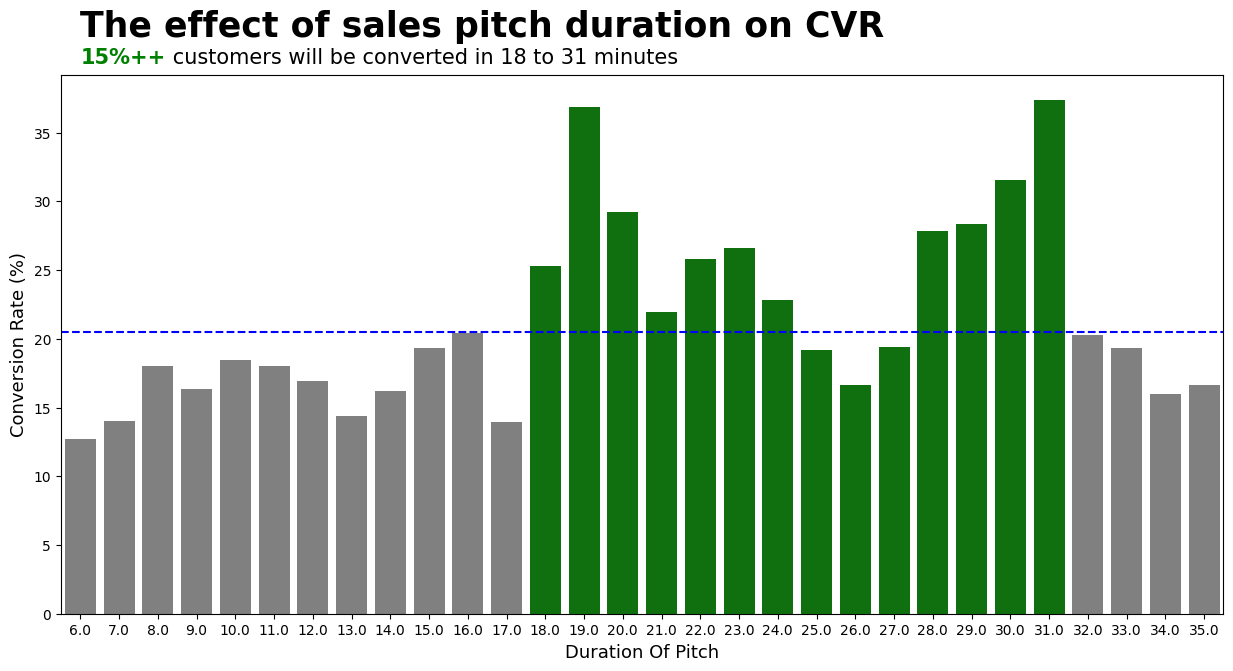

In [29]:
plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
sns.barplot(x='DurationOfPitch',y='%',data=all,orient='v',order=all['DurationOfPitch'],color='grey',saturation=0.3)
sns.barplot(x='DurationOfPitch',y='%',data=all.iloc[12:26],orient='v',order=all['DurationOfPitch'],color='g')
plt.ylabel('Conversion Rate (%)',size=13)
plt.xlabel('Duration Of Pitch',size=13)
plt.axhline(20.5, linestyle='dashed',color='b')
plt.text(0,42,'The effect of sales pitch duration on CVR',size=25,family='sans',weight='bold')
plt.text(0,40,s='15%++',fontdict=({'size':15,'family':'sans'}),c='g',weight='bold')
plt.text(0,40,s='              customers will be converted in 18 to 31 minutes',fontdict=({'size':15,'family':'sans'}))

# Save plot
plt.savefig('img/insight4.png')
plt.show()

### Does city tier affect sale?

In [30]:
df_city = df2.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df2.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')
df_city = df_city[df_city.ProdTaken==1].reset_index(drop=True)
df_city['%']=round(df_city.TotalCust/df_city.CustomerID*100,2)
df_city = df_city.sort_values(by='%',ascending=False).reset_index(drop=True)
df_city

,CityTier,ProdTaken,TotalCust,CustomerID,%
0,3,1,354,1500,23.60
1,2,1,46,198,23.23
2,1,1,520,3190,16.30


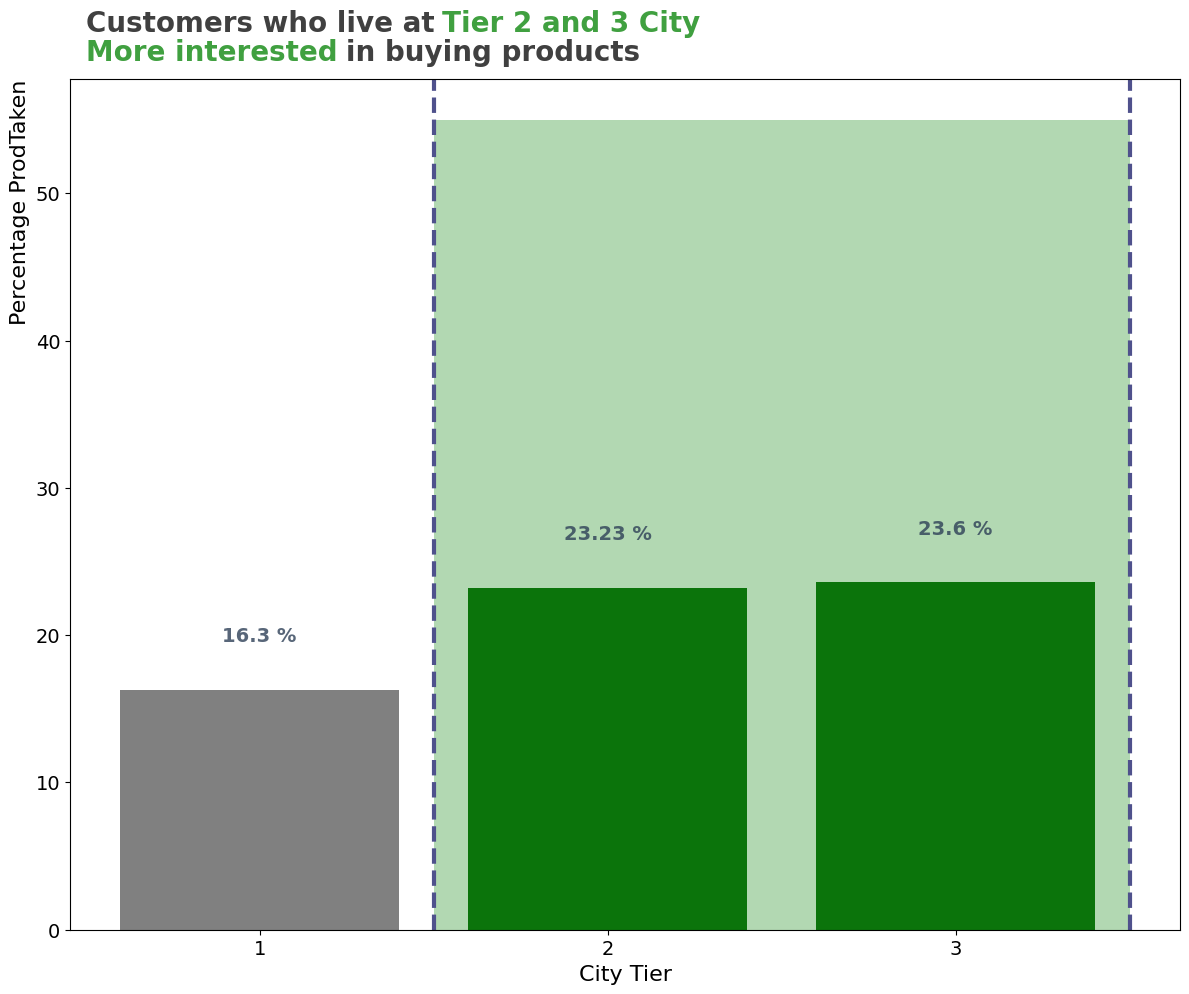

In [31]:
plt.figure(figsize=(12,10))

sns.barplot(x='CityTier',y='%',data=df_city, palette=['grey'])
sns.barplot(x='CityTier',y=[23.60,23.23,0],data=df_city, palette=['green'])

plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks(size=14)
plt.axvline(x=.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=2.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 2.6 ,1), [[55]], colors='green', alpha=0.3)

data_bars = df_city.sort_values('%',ascending=True)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Customers who live at                            ', 
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                                     Tier 2 and 3 City                            ', 
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75,c='g')
plt.text(s='More interested ', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='g')
plt.text(s='                           in buying products', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)

plt.tight_layout()

# Save plot
plt.savefig('img/insight5.png')
plt.show()


### Does ownership of a passport affect sale?

In [32]:
df_passport = df2.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df2.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['%']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='%',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken,CustomerID_x,CustomerID_y,%
0,1,1,494,1422,34.74
1,0,1,426,3466,12.29


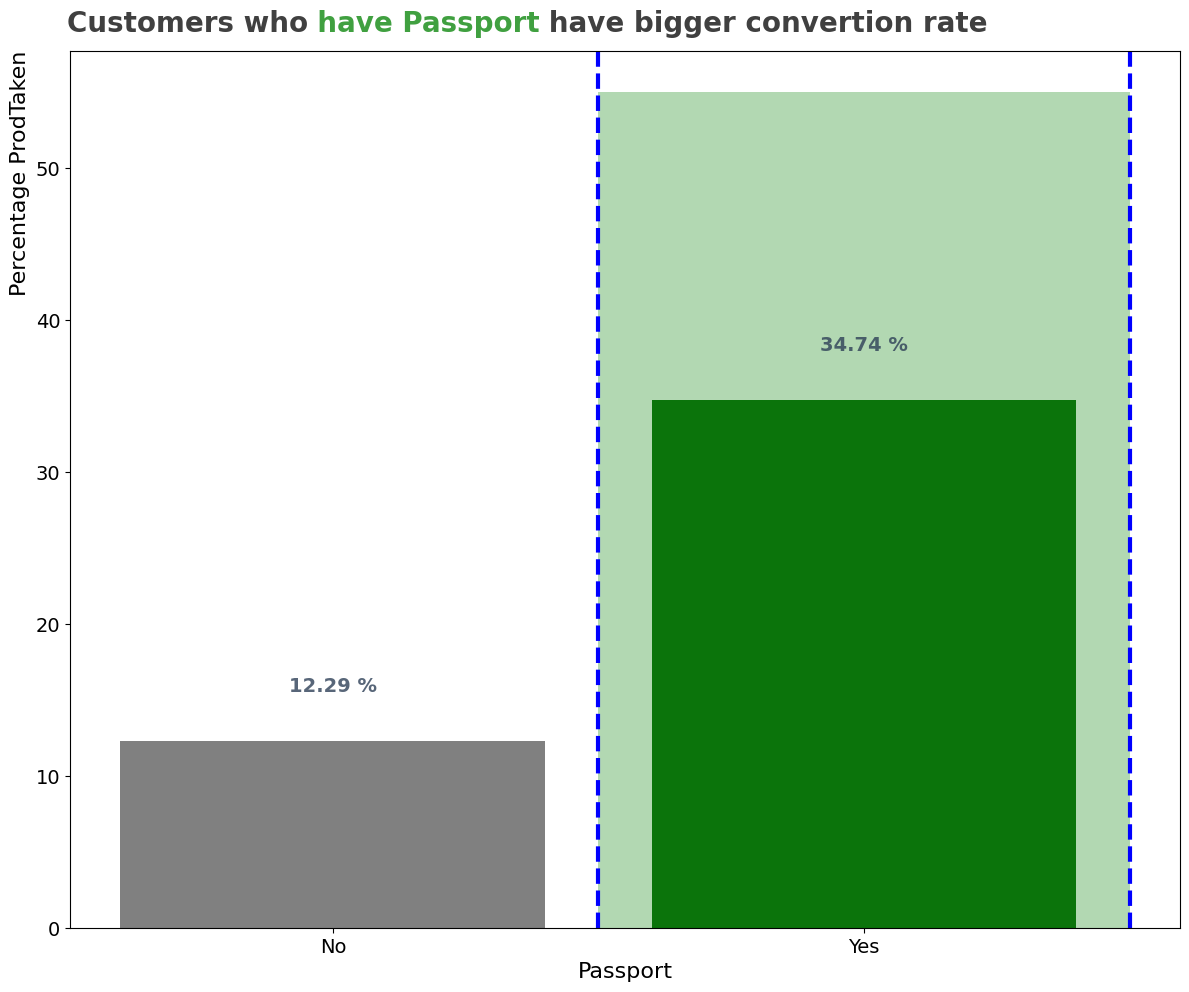

In [33]:
plt.figure(figsize=(12,10))

sns.barplot( x='Passport',y='%',data=df_passport, palette=['grey'])
sns.barplot( x='Passport',y=[34.74,0],data=df_passport, palette=['green'])

plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks([1,0],labels = ['Yes','No'],size=14)
plt.axvline(x=.5, color='blue', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='blue', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 1.6 ,1), [[55]], colors='green', alpha=0.3)

data_bars = df_passport.sort_values('%',ascending=True)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s='Customers who                         have bigger convertion rate', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)
plt.text(s='                          have Passport', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='g')

plt.tight_layout()

# Save plot
plt.savefig('img/insight6.png')
plt.show()

# 3. Data Preprocessing

In [34]:
# Copy dataframe for preprocessing
df_prep = df.copy()

## Handle inconsistent values

In [35]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

print('Gender :', df_prep['Gender'].unique().tolist())
print('Marital Status:', df_prep['MaritalStatus'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Unmarried', 'Divorced', 'Married']


## Handle missing values

In [36]:
# Counts missing data
missing_cols = df_prep.columns[df_prep.isnull().any()]
df_prep[missing_cols].isnull().sum()

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [37]:
# Statistics on numerical columns (missing cols)
df_prep[missing_cols].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [38]:
# Statistics on categorical columns (missing cols)
df_prep[missing_cols].select_dtypes(include='object').describe()

,TypeofContact
count,4863
unique,2
top,Self Enquiry
freq,3444


From Exploratory Data Analysis, handle missing values can be done by:
- `Age` column will be fill by mean (distribution of data approach normal).
- `TypeofContact` column will be filled by 'Unknown' because mode value is too high. 
- `DurationOfPitch` column will be filedl by median (distribution of data contain outliers or skewed).
- `NumberOfFollowups` column will be filled by min or the lowest value (considered that there is no follow up after pitching).
- `PreferredPropertyStar` column will be filled by 3 (moderate rating value).
- `NumberOfTrips` column will be filled by median (distribution of data contain outliers or skewed).
- `NumberOfChildrenVisiting` column will be filled by 0 (considered that does not have a children under 5 years old).
- `MonthlyIncome` column will be filled by median (distribution of data contain outliers or skewed).

In [39]:
# Handling missing values
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [40]:
# Re-check missing values
print('Is there is still some columns with null/missing values?', df_prep.isnull().any().any())

Is there is still some columns with null/missing values? False


## Handling duplicate data

In [41]:
# Remove CustomerID to see duplicate rows
df_prep.drop('CustomerID', axis=1, inplace=True)
print(f'Count of rows before filtering duplicate data: {df_prep.shape[0]} rows')

# Remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'Count of rows after filtering duplicate data: {df_prep.shape[0]} rows')

Count of rows before filtering duplicate data: 4888 rows
Count of rows after filtering duplicate data: 4747 rows


## Handling outliers

In [42]:
# View total rows before filtered
print(f'Count of rows before filtering outliers: {df_prep.shape[0]} rows')

# Handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# View total rows after filtered
df_prep = df_prep[filtered_entries]
print(f'Count of rows after filtering outliers: {df_prep.shape[0]} rows')

Count of rows before filtering outliers: 4747 rows
Count of rows after filtering outliers: 4737 rows


## Feature Engineering

### Feature Encoding

In [43]:
# View unique values on categorical columns
for col in df_prep.select_dtypes(include='object').columns:
    print(f'{col} : {df_prep[col].unique().tolist()}')
    print(df_prep[col].value_counts())
    print('--' * 10)

TypeofContact : ['Self Enquiry', 'Company Invited', 'Unknown']
TypeofContact
Self Enquiry       3346
Company Invited    1366
Unknown              25
Name: count, dtype: int64
--------------------
Occupation : ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Occupation
Salaried          2287
Small Business    2028
Large Business     420
Free Lancer          2
Name: count, dtype: int64
--------------------
Gender : ['Female', 'Male']
Gender
Male      2829
Female    1908
Name: count, dtype: int64
--------------------
ProductPitched : ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
ProductPitched
Basic           1794
Deluxe          1680
Standard         714
Super Deluxe     324
King             225
Name: count, dtype: int64
--------------------
MaritalStatus : ['Unmarried', 'Divorced', 'Married']
MaritalStatus
Married      2277
Unmarried    1512
Divorced      948
Name: count, dtype: int64
--------------------
Designation : ['Manager', 'Executive', 'Senior Manager', 

From the result, it can be concluded that"
- The values of 'Free Lancer' from `Occupation` column is to small, can be deleted.
- `Gender` column have a 2 unique value which mean can be done by Label Encoding.
- `ProductPitched` and `Designation` column have ordinal data unique values, can be done with Label Encoding.
- `TypeofContact`, `Occupation`, and `MaritalStatus` have more than 2 unique values and does not assorted as ordinal data which mean can be done by One Hot Encoding.

In [44]:
# Remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation']!='Free Lancer']

# View dimension size of data before encoding
print(f'Dimension of data before encoding: {df_prep.shape[0]} rows and {df_prep.shape[1]} columns')

# Label encoding
df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})

# One hot encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(df_prep[col], prefix=col,drop_first=True) #menggunakan drop first = True untuk mengurangi dimensi
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)
    
# View dimension size of data before encoding
print(f'Dimension of data after encoding {df_prep.shape[0]} rows and {df_prep.shape[1]} columns')

Dimension of data before encoding: 4735 rows and 19 columns
Dimension of data after encoding 4735 rows and 22 columns


### Feature Extraction

In [45]:
# Get correlation > +- 0.5
df_corr = df_prep.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.595
ProductPitched with MonthlyIncome has correlation : 0.678
Occupation_Salaried with Occupation_Small Business has correlation : -0.837
MaritalStatus_Married with MaritalStatus_Unmarried has correlation : -0.659


In [46]:
# Create new column for feature
df_prep['TotalVisiting'] = df_prep['NumberOfPersonVisiting'] + df_prep['NumberOfChildrenVisiting']
df_prep.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

## Split Data Train and Data Test

In [47]:
X = df_prep.drop('ProdTaken', axis=1)
y = df_prep['ProdTaken']

In [48]:
# Splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f'Total data train consists of {len(X_train)} rows')
print(f'Count class 0 : {sum(y_train==0)}')
print(f'Count class 1 : {sum(y_train==1)}\n')

print(f'Total data test consist of {len(X_test)} rows')
print(f'Count class 0 : {sum(y_test==0)}')
print(f'Count class 1 : {sum(y_test==1)}\n')

Total data train consists of 3788 rows
Count class 0 : 3076
Count class 1 : 712

Total data test consist of 947 rows
Count class 0 : 769
Count class 1 : 178



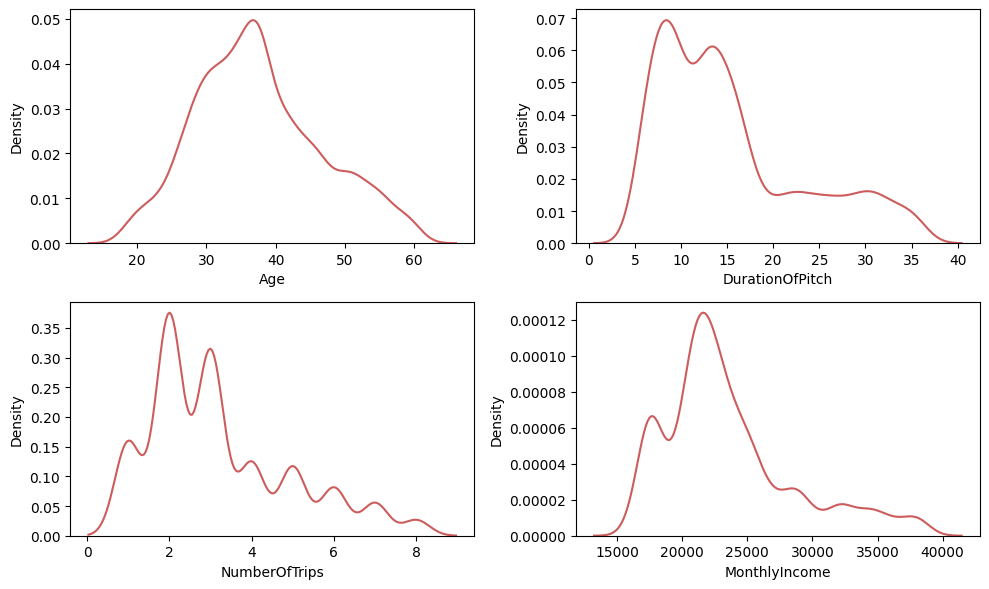

In [49]:
# Distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_prep[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()
    
plt.savefig('img/distribution.png')

From the results of visualization, it can be concluded that:
- `Age` column will be scaled with *Normalization* because it approach a normal distribution. 
- `NumberOfTrip columns` column will not be scaled, because the value itself does not too variative after handling outliers.
- `DurationOfPitch` and `MonthlyIncome` column will be scaled with *Standardization* because it is a little bit skewed.

In [50]:
# Scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# Scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))


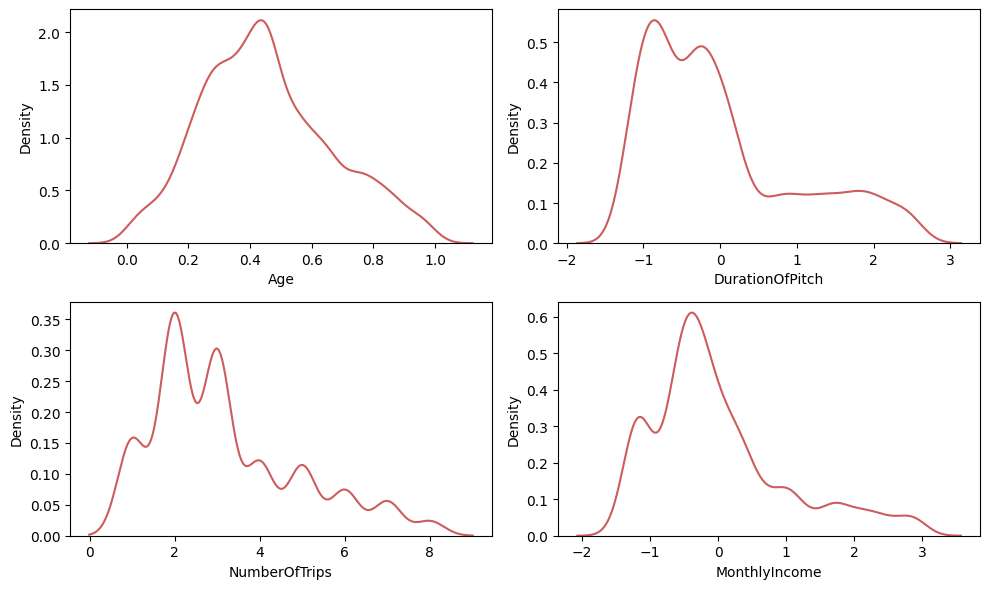

In [51]:
# Distribution of data after scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

plt.savefig('img/scaleddistribution.png')

In [52]:
# Statistics data after transformation
X_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3788.000000,3788.000000,3788.000000,3.788000e+03
mean,0.453387,0.000000,3.197202,-3.170056e-16
std,0.210871,1.000132,1.745316,1.000132e+00
min,0.000000,-1.283932,1.000000,-1.492633e+00
25%,0.302326,-0.788172,2.000000,-6.095633e-01
50%,0.441860,-0.292411,3.000000,-2.373719e-01
75%,0.581395,0.451230,4.000000,3.789695e-01
max,1.000000,2.558212,8.000000,2.991687e+00


From the statistics result, it can be concluded that: 
- `Age` column min = 0 and max = 0 after scaled by *Normalization*.
- `NumberOfTrips` column min = 1 and max = 8, the data range considered does not too variative.
- `DurationOfPitch` and `MonthlyIncome` column mean = -1 and standard deviation = 1 after scaled by *Standardization*.

### Feature Selection

In [53]:
# Feature selection using Variance threshold
vars = VarianceThreshold(0.2)
vars.fit(X_train)
X_train_fs = pd.DataFrame(vars.transform(X_train),columns=vars.get_feature_names_out())
X_test_fs = pd.DataFrame(vars.transform(X_test),columns=vars.get_feature_names_out())

In [54]:
# Feature selection using fclassif for numerical feature
nume_cols = ['DurationOfPitch','NumberOfFollowups','NumberOfTrips','MonthlyIncome','TotalVisiting']

classif = SelectKBest(f_classif,k=4)
classif.fit(X_train_fs[nume_cols],y_train)
X_train_fnum = pd.DataFrame(classif.transform(X_train_fs[nume_cols]),columns=classif.get_feature_names_out())
X_test_fnum = pd.DataFrame(classif.transform(X_test_fs[nume_cols]),columns=classif.get_feature_names_out())

In [55]:
# Feature selection using chi2 for categorical feature
cate_cols = ['CityTier','Gender','ProductPitched','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar','Designation',
 'TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business','MaritalStatus_Married','MaritalStatus_Unmarried',]

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cate_cols],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cate_cols]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cate_cols]),columns=chi2.get_feature_names_out())

In [56]:
# Merging all feature selection result
all_coll = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[all_coll]
X_test = X_test[all_coll]

print(f'The selection result of features are: {all_coll}')

The selection result of features are: ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'CityTier', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'MaritalStatus_Married', 'MaritalStatus_Unmarried']


### Handling Class Imbalance 

In [57]:
print(f'Total data test before SMOTE consists {len(X_train)} rows')
print(f'Count class 0 : {sum(y_train==0)}')
print(f'Count class 1 : {sum(y_train==1)}\n')

X_train,y_train = SMOTE(random_state=42).fit_resample(X_train,y_train)

print(f'Total data test after SMOTE consists {len(X_test)} rows')
print(f'Count class 0 : {sum(y_train==0)}')
print(f'Count class 1 : {sum(y_train==1)}\n')

Total data test before SMOTE consists 3788 rows
Count class 0 : 3076
Count class 1 : 712

Total data test after SMOTE consists 947 rows
Count class 0 : 3076
Count class 1 : 3076



In [58]:
# Re-checking null values
X_train.isna().sum()

DurationOfPitch            0
NumberOfFollowups          0
NumberOfTrips              0
MonthlyIncome              0
CityTier                   0
ProductPitched             0
PreferredPropertyStar      0
Passport                   0
PitchSatisfactionScore     0
Designation                0
MaritalStatus_Married      0
MaritalStatus_Unmarried    0
dtype: int64

In [59]:
# Re-checking null values
y_train.isna().sum()

0

In [60]:
# Save file preprocessing into csv
X_train.to_csv('dataset/TravelData_Train.csv', index=False)
X_test.to_csv('dataset/TravelData_Test.csv', index=False)

# 4. Machine Learning Modelling

### Data Modelling

Will use 12 features resulting from feature selection using variance threshold, fclassif and chi-square.

In [61]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
    
    print(f'Model {title} result:')
    print(f'- Count TP (True Positive) = {cm[1][1]}')
    print(f'- Count TN (True Negative) = {cm[0][0]}')
    print(f'- Count FP (False Positive) = {cm[0][1]}')
    print(f'- Count FN (False Negative) = {cm[1][0]}')

## 1. Logistic Regression

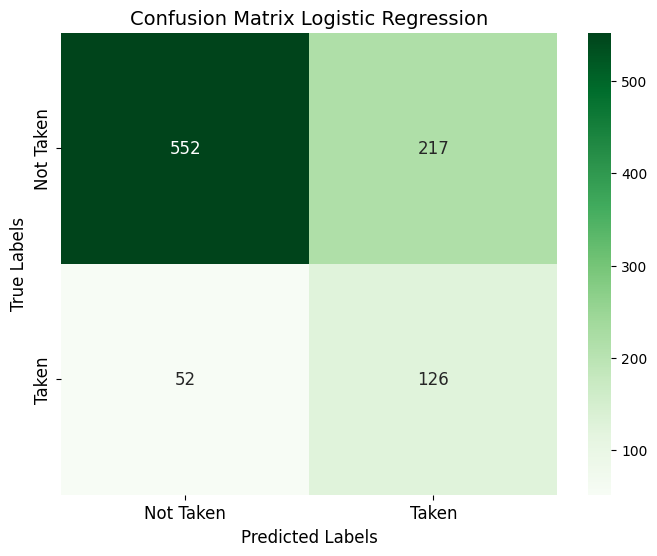

Model Logistic Regression result:
- Count TP (True Positive) = 126
- Count TN (True Negative) = 552
- Count FP (False Positive) = 217
- Count FN (False Negative) = 52


<Figure size 640x480 with 0 Axes>

In [62]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

plt.savefig('img/LR.png')

## 2. Decision Tree

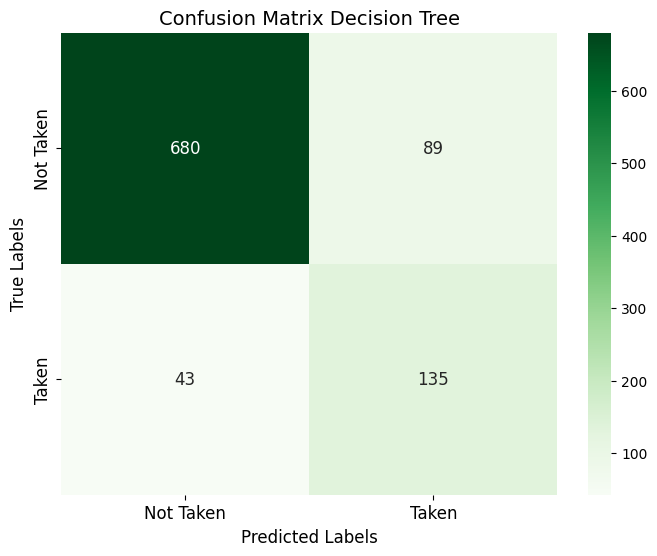

Model Decision Tree result:
- Count TP (True Positive) = 135
- Count TN (True Negative) = 680
- Count FP (False Positive) = 89
- Count FN (False Negative) = 43


<Figure size 640x480 with 0 Axes>

In [63]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

plt.savefig('img/DT.png')

## 3. Random Forest

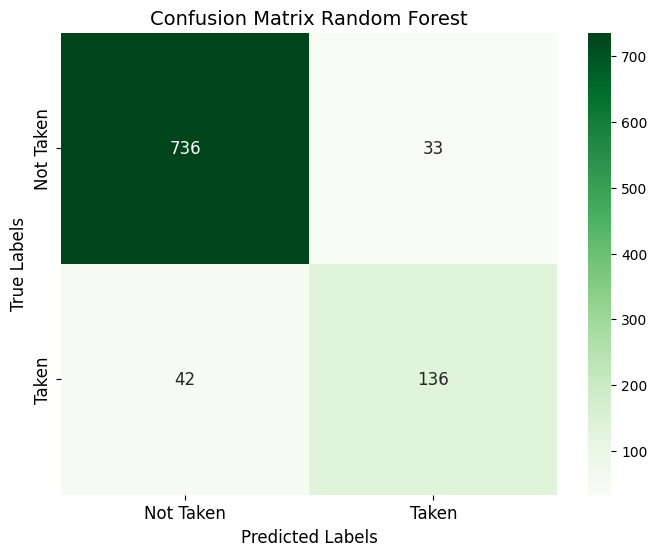

Model Random Forest result:
- Count TP (True Positive) = 136
- Count TN (True Negative) = 736
- Count FP (False Positive) = 33
- Count FN (False Negative) = 42


<Figure size 640x480 with 0 Axes>

In [64]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

plt.savefig('img/RF.png')

## 4. AdaBoost

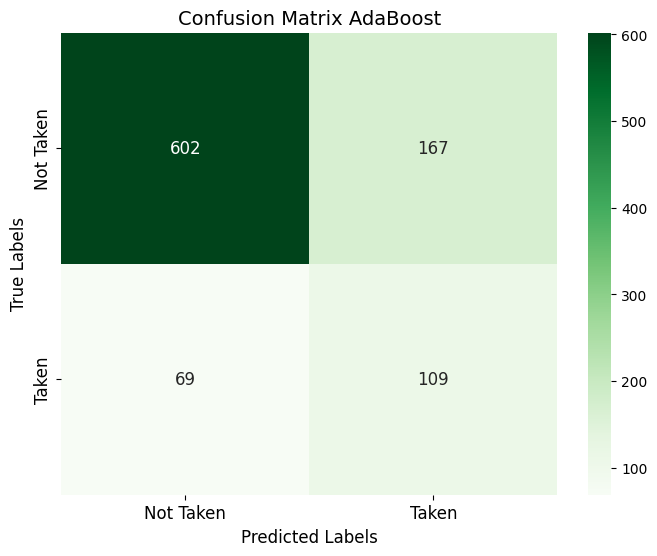

Model AdaBoost result:
- Count TP (True Positive) = 109
- Count TN (True Negative) = 602
- Count FP (False Positive) = 167
- Count FN (False Negative) = 69


<Figure size 640x480 with 0 Axes>

In [65]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

plotting_confusion_matrix(model_adb, X_test, y_test, title='AdaBoost')

plt.savefig('img/ADB.png')

## 5. XGBoost

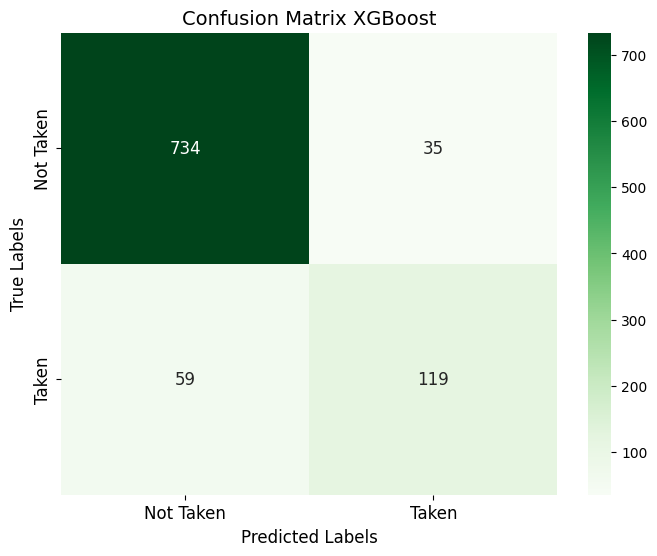

Model XGBoost result:
- Count TP (True Positive) = 119
- Count TN (True Negative) = 734
- Count FP (False Positive) = 35
- Count FN (False Negative) = 59


<Figure size 640x480 with 0 Axes>

In [66]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

plotting_confusion_matrix(model_xgb, X_test, y_test, title='XGBoost')

plt.savefig('img/XGB.png')

## Model Evaluation

In this case, the goal is to predict whether customers will buy a travel package based on the available data. It is possible that there are still customers who have the potential to be converted to buy a travel package, then:
- Metric evaluation that will be more focused is **Accuracy**, we want to consider precision when predicting.

In [67]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [68]:
# Scoring base model
model_list_base = [model_lr, model_dt, model_rf, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7159,0.3673,0.7079,0.4837,0.3460,0.7913,0.8143
1,Decision Tree,0.8606,0.6027,0.7584,0.6716,0.5909,0.8213,1.0000
2,Random Forest,0.9208,0.8047,0.7640,0.7839,0.7358,0.9552,1.0000
3,AdaBoost,0.7508,0.3949,0.6124,0.4802,0.3398,0.7808,0.8924
4,XGBoost,0.9007,0.7727,0.6685,0.7169,0.6596,0.9238,0.9998


From the result of evaluation, it can be concluded that:
- **Model Logistic Regression** are able to predict **enough** Accuracy: 80.68%.
- **Model Decision Tree** are able to predict **high enough** Accuracy: 86.48%.
- **Model Random Forest** are able to predict **high** Accuracy: 91.87%.
- **Model AdaBoost** are able to predict **high enough** Accuracy: 81.31%.
- **Model XGBoost** are able to predict **high enough** Accuracy: 90.60%.

So it can be concluded from the selected five models, while the **Random Forest Model** is the best base model, we still have to continue hyperparameter tuning to avoid overfitting.

## Hyperparameter Tuning

In [69]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

## 1. Logistic Regression (Tuned)

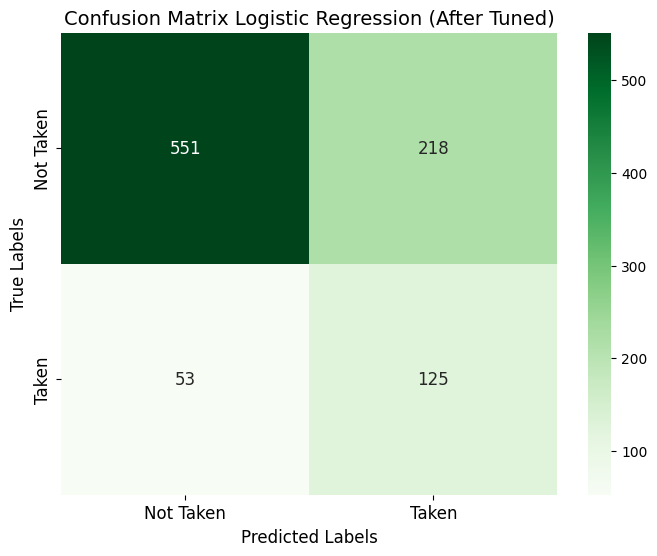

Model Logistic Regression (After Tuned) result:
- Count TP (True Positive) = 125
- Count TN (True Negative) = 551
- Count FP (False Positive) = 218
- Count FN (False Negative) = 53


<Figure size 640x480 with 0 Axes>

In [70]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='accuracy', random_state=42)
tuned_lr.fit(X_train, y_train)

plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')

plt.savefig('img/tunedLR.png')

In [71]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=='*10)
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=='*10)
eval_after_hyperparameter_tuning(tuned_lr, X_train, y_train, X_test, y_test)

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 6.158482110660261
Accuracy: 0.7138
Precision: 0.3644
Recall: 0.7022
F1 Score: 0.4798
AUC (Test): 0.3404
AUC (Train): 0.7911


## 2. Decision Tree (Tuned)

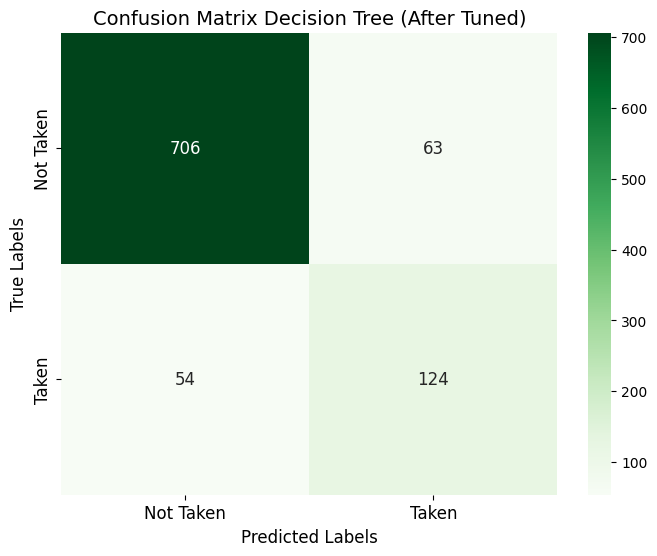

Model Decision Tree (After Tuned) result:
- Count TP (True Positive) = 124
- Count TN (True Negative) = 706
- Count FP (False Positive) = 63
- Count FN (False Negative) = 54


<Figure size 640x480 with 0 Axes>

In [72]:
model_dt = DecisionTreeClassifier(random_state=42)
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='accuracy', random_state=42)
tuned_dt.fit(X_train, y_train)

plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')

plt.savefig('img/tunedDT.png')

In [73]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('=='*10)
show_best_hyperparameter(tuned_dt, list_hyperparameters[1])
print('=='*10)
eval_after_hyperparameter_tuning(tuned_dt, X_train, y_train, X_test, y_test)

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto
Accuracy: 0.8765
Precision: 0.6631
Recall: 0.6966
F1 Score: 0.6795
AUC (Test): 0.6033
AUC (Train): 0.8074


## 3. Random Forest (Tuned)

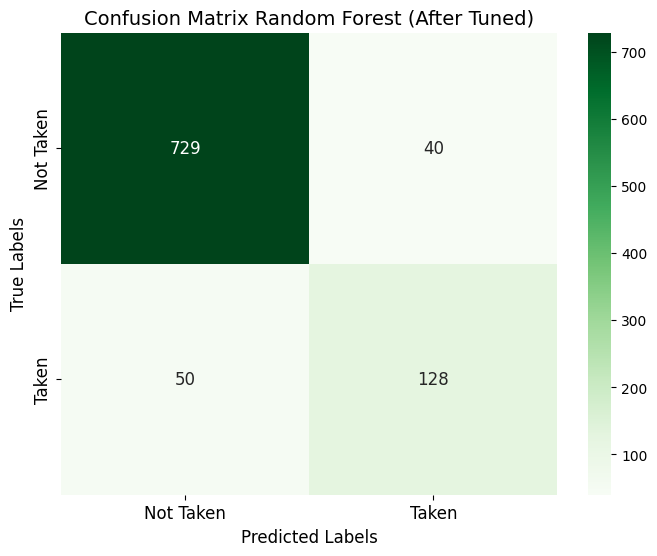

Model Random Forest (After Tuned) result:
- Count TP (True Positive) = 128
- Count TN (True Negative) = 729
- Count FP (False Positive) = 40
- Count FN (False Negative) = 50


<Figure size 640x480 with 0 Axes>

In [74]:
model_rf = RandomForestClassifier(random_state=42)
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='accuracy', random_state=42)
tuned_rf.fit(X_train, y_train)

plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')

plt.savefig('img/tunedRF.png')

In [75]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('=='*10)
show_best_hyperparameter(tuned_rf, list_hyperparameters[2])
print('=='*10)
eval_after_hyperparameter_tuning(tuned_rf, X_train, y_train, X_test, y_test)

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True
Accuracy: 0.905
Precision: 0.7619
Recall: 0.7191
F1 Score: 0.7399
AUC (Test): 0.6822
AUC (Train): 0.9459


## 4. AdaBoost (Tuned)

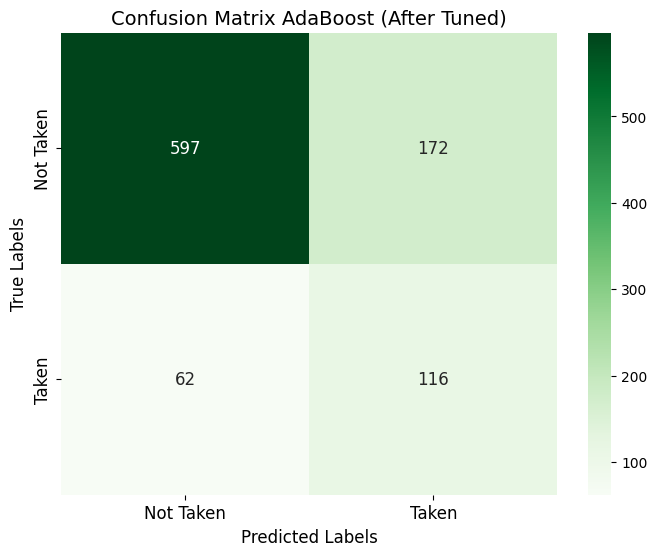

Model AdaBoost (After Tuned) result:
- Count TP (True Positive) = 116
- Count TN (True Negative) = 597
- Count FP (False Positive) = 172
- Count FN (False Negative) = 62


<Figure size 640x480 with 0 Axes>

In [76]:
model_adb = AdaBoostClassifier(random_state=42)
tuned_adb = RandomizedSearchCV(model_adb, list_hyperparameters[3], cv=5, scoring='accuracy', random_state=42)
tuned_adb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_adb, X_test, y_test, title='AdaBoost (After Tuned)')

plt.savefig('img/tunedADB.png')

In [77]:
print('MODEL ADABOOST AFTER HYPERPARAMETER TUNING')
print('=='*10)
show_best_hyperparameter(tuned_adb, list_hyperparameters[3])
print('=='*10)
eval_after_hyperparameter_tuning(tuned_adb, X_train, y_train, X_test, y_test)

MODEL ADABOOST AFTER HYPERPARAMETER TUNING
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R
Accuracy: 0.7529
Precision: 0.4028
Recall: 0.6517
F1 Score: 0.4979
AUC (Test): 0.3635
AUC (Train): 0.7851


## 5. XGBoost (Tuned)

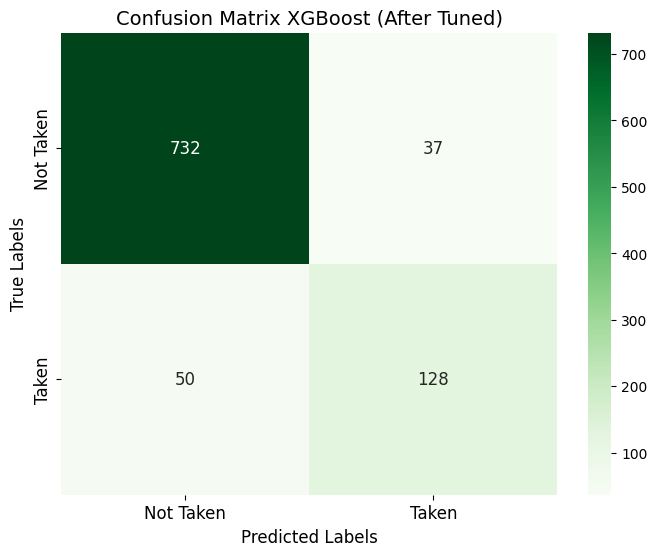

Model XGBoost (After Tuned) result:
- Count TP (True Positive) = 128
- Count TN (True Negative) = 732
- Count FP (False Positive) = 37
- Count FN (False Negative) = 50


<Figure size 640x480 with 0 Axes>

In [78]:
model_xgb = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb = RandomizedSearchCV(model_xgb, list_hyperparameters[-1], cv=5, scoring='accuracy', random_state=42)
tuned_xgb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_xgb, X_test, y_test, title='XGBoost (After Tuned)')

plt.savefig('img/tunedXGB.png')

In [79]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=='*10)
show_best_hyperparameter(tuned_xgb, list_hyperparameters[-1])
print('=='*10)
eval_after_hyperparameter_tuning(tuned_xgb, X_train, y_train, X_test, y_test)

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 50
Best min_child_weight: 2
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best learning_rate: 0.5252525252525253
Best reg_lambda: 0.8
Best reg_alpha: 0.8
Accuracy: 0.9081
Precision: 0.7758
Recall: 0.7191
F1 Score: 0.7464
AUC (Test): 0.6911
AUC (Train): 0.9348


In [80]:
# Base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7159,0.3673,0.7079,0.4837,0.3460,0.7913,0.8143
1,Decision Tree,0.8606,0.6027,0.7584,0.6716,0.5909,0.8213,1.0000
2,Random Forest,0.9208,0.8047,0.7640,0.7839,0.7358,0.9552,1.0000
3,AdaBoost,0.7508,0.3949,0.6124,0.4802,0.3398,0.7808,0.8924
4,XGBoost,0.9007,0.7727,0.6685,0.7169,0.6596,0.9238,0.9998


In [81]:
# Tuned model
model_list_tuned = [tuned_lr, tuned_dt, tuned_rf, tuned_adb, tuned_xgb]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7138,0.3644,0.7022,0.4798,0.3404,0.7911,0.8143
1,Decision Tree,0.8765,0.6631,0.6966,0.6795,0.6033,0.8074,1.0000
2,Random Forest,0.9050,0.7619,0.7191,0.7399,0.6822,0.9459,0.9999
3,AdaBoost,0.7529,0.4028,0.6517,0.4979,0.3635,0.7851,0.8932
4,XGBoost,0.9081,0.7758,0.7191,0.7464,0.6911,0.9348,1.0000


In [82]:
#Check Overfitting and Underfitting
def checkoverfit(model,x_train,x_test,title):
    check = pd.DataFrame({
        'Model': title,
        'accuracy_score_train':[accuracy_score(y_train,model.predict(x_train))],
        'accuracy_score_test' :[accuracy_score(y_test,model.predict(x_test))],
        'accuracy_score_cv' : [model.best_score_]
        })
    return check
checkoverfit(tuned_xgb,X_train,X_test,'XGBoost Classifier')

,Model,accuracy_score_train,accuracy_score_test,accuracy_score_cv
0,XGBoost Classifier,0.999512,0.908131,0.941823


From the result of evaluation, it can be concluded that:
- **Model Logistic Regression** predict Accuracy 80.68% ====> same as Accuracy before hyperparameter tuning.
- **Model Decision Tree** predict Accuracy 83.95% ====> 2% lower.
- **Model Random Forest** predict Accuracy 89.76% ====> 2% lower.
- **Model AdaBoost** predict Accuracy 81.84% ====> 1% lower.
- **Model XGBoost** predict F1 Score 91.45% ====> 1% upper.

From the results of these five models, it can be concluded that the **XGBoost** model remains the best model with the highest accuracy **91.44%** and the results of other scoring metrics are also better with the hyperparameter tuning that has been done and does not overfit.

## Modelling Conclusion

1. From a series of modeling that has been done, the model with feature selection based on feature importance gives better results where the 12 features include: `DurationOfPitch`, `NumberOfFollowups`, `NumberOfTrips`, `MonthlyIncome`, `CityTier`, `ProductPitched`, `PreferredPropertyStar`, `Passport`, `PitchSatisfactionScore`, `Designation`, `MaritalStatus_Married`, and `MaritalStatus_Unmarried`.

2. The model that gives the best results is the **XGBoost model with an accuracy of 91.45%** where hyperparameter tuning has been done by considering other metric values. This model will later be used to analyze the more dominant features to become insights and the model prediction results will be used as a reference for our business.

# 5. Insights and Recommendation

## Modelling Insights

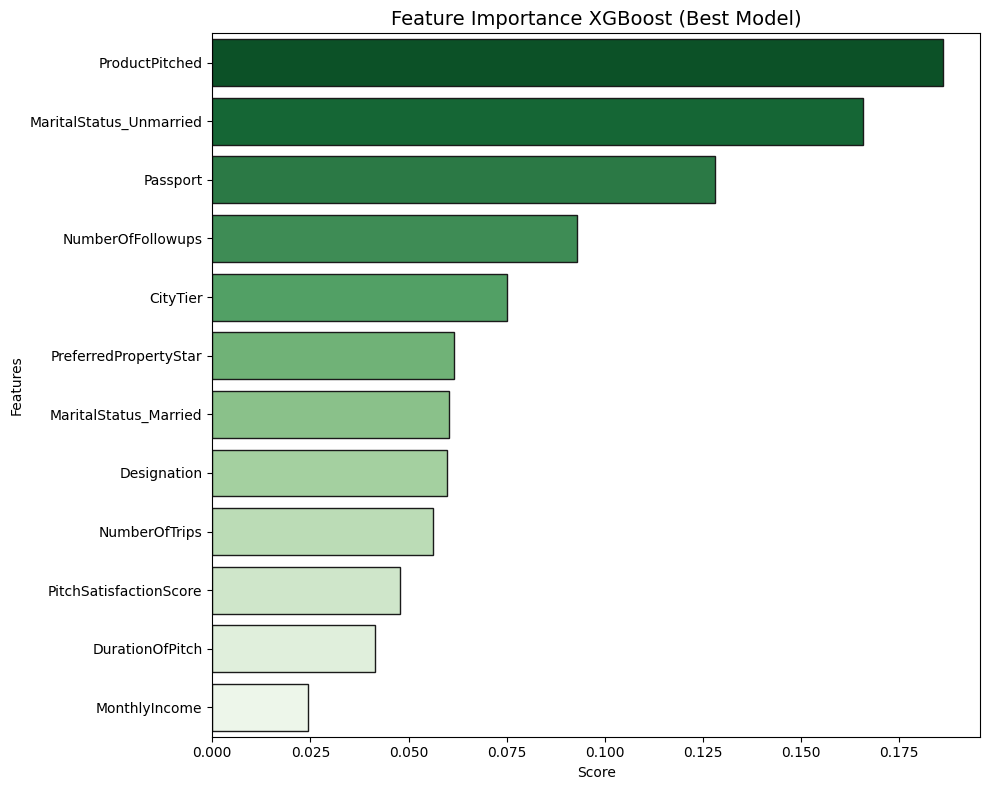

In [94]:
# Feature importance using best model
feature_importance_rf = pd.Series(tuned_xgb.best_estimator_.feature_importances_, index=X_train.columns)
df_feature = feature_importance_rf.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='Greens_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance XGBoost (Best Model)', fontsize=14)
plt.tight_layout()
plt.savefig('img/feature_importance.png')
plt.show()

In [84]:
# Combine prediction labels into test data
df_final_test = X_test.copy()
best_model = tuned_xgb.best_estimator_
df_final_test['ProdTaken'] = y_test
df_final_test['ProdTaken_Pred'] = best_model.predict(X_test)
df_final_test['ProdTaken_PredProba'] = best_model.predict_proba(X_test)[:,1]
df_final_test.head()

,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,CityTier,ProductPitched,PreferredPropertyStar,Passport,PitchSatisfactionScore,Designation,MaritalStatus_Married,MaritalStatus_Unmarried,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
3386,0.203350,4.0,5.0,0.440960,1,1,3.0,0,3,1,False,False,0,0,0.013899
1649,-0.044531,3.0,2.0,-1.239323,1,0,3.0,0,1,2,False,True,0,0,0.013157
3675,0.575170,4.0,8.0,0.137543,1,2,4.0,0,4,0,False,True,0,0,0.332667
3517,2.558212,6.0,3.0,0.333021,1,2,4.0,0,1,0,False,False,0,0,0.013288
1777,1.938511,4.0,4.0,0.696251,1,1,4.0,0,3,1,True,False,0,0,0.171355


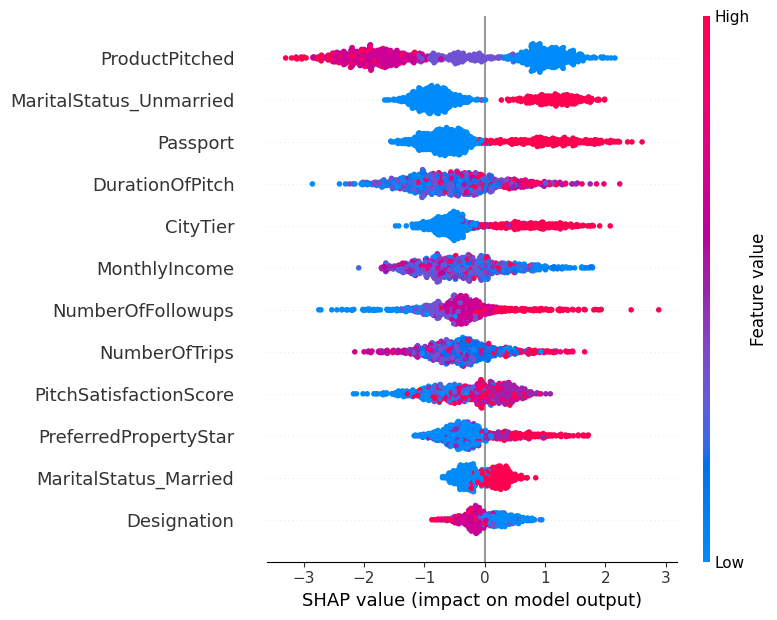

<Figure size 640x480 with 0 Axes>

In [85]:
explainer = shap.TreeExplainer(tuned_xgb.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.savefig('img/shap.png')

***
    From SHAP observation, it can be concluded that:
        1. If customer have a passport, live in a tier 3 city and are not married, it will have a positive value in the model (buy).
        2. Basic product that are pitched and more follow-up, the more positive the value of the model.
***

## Gain Lift Analysis

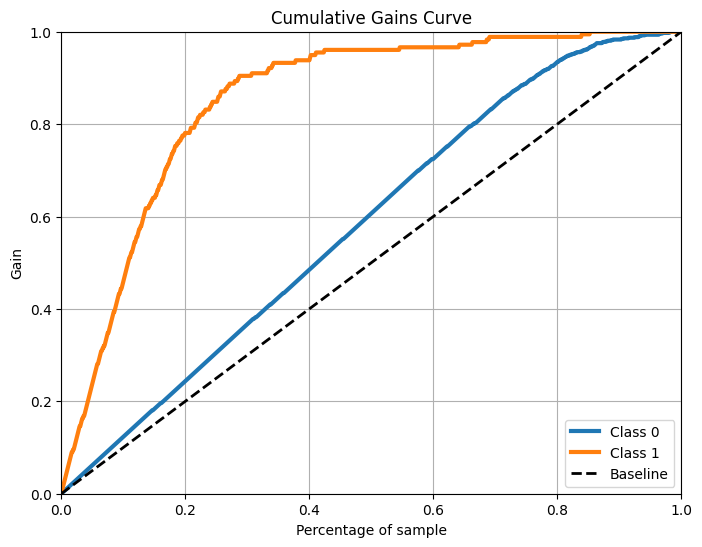

In [86]:
skplt.metrics.plot_cumulative_gain(df_final_test['ProdTaken'],tuned_xgb.predict_proba(X_test),figsize=(8,6))
plt.savefig('img/gain.png')
plt.show()

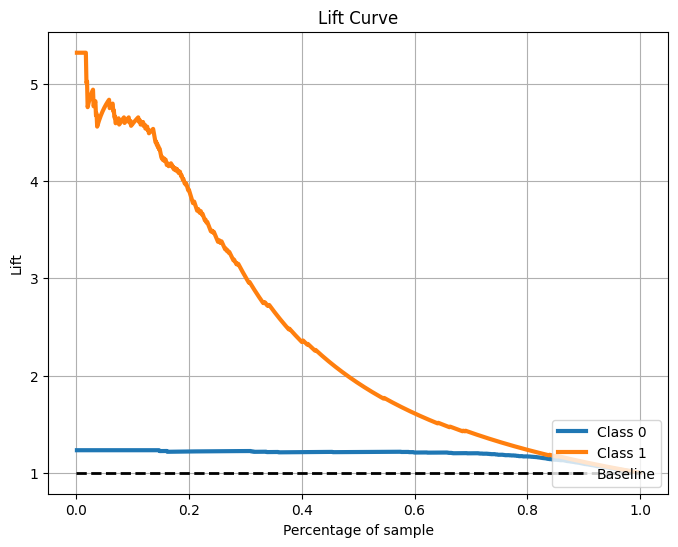

In [87]:
skplt.metrics.plot_lift_curve(df_final_test['ProdTaken'],tuned_xgb.predict_proba(X_test),figsize=(8,6))
plt.savefig('img/lift.png')
plt.show()

***
It is known from the table above that if you use 20% of the gain table, this model can predict 80% of all existing responses. And from the lift table we can see that if we use 20% of the data, the performance is 4x higher than the random value. it can be concluded that this model is very good at predicting and is not just a coincidence.
***

# Business Impact

## Marketing Cost

In [88]:
df_final_test.head()

,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,CityTier,ProductPitched,PreferredPropertyStar,Passport,PitchSatisfactionScore,Designation,MaritalStatus_Married,MaritalStatus_Unmarried,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
3386,0.203350,4.0,5.0,0.440960,1,1,3.0,0,3,1,False,False,0,0,0.013899
1649,-0.044531,3.0,2.0,-1.239323,1,0,3.0,0,1,2,False,True,0,0,0.013157
3675,0.575170,4.0,8.0,0.137543,1,2,4.0,0,4,0,False,True,0,0,0.332667
3517,2.558212,6.0,3.0,0.333021,1,2,4.0,0,1,0,False,False,0,0,0.013288
1777,1.938511,4.0,4.0,0.696251,1,1,4.0,0,3,1,True,False,0,0,0.171355


In [89]:
cost_per_person = 60 # in usd 
cost_before = df_final_test[df_final_test.NumberOfFollowups!=0].shape[0]*cost_per_person
cost_after = df_final_test[(df_final_test.ProdTaken_Pred==1)].shape[0]*cost_per_person
cost_diff = cost_before - cost_after

print(f'Required Marketing cost before using the model are ${cost_before} USD')
print(f'Required Marketing cost after using the model are ${cost_after} USD')
print(f'By using the model, can reduce marketing costs to ${cost_diff} USD or {round(cost_diff*100/cost_before,2)} % lower')

Required Marketing cost before using the model are $56340 USD
Required Marketing cost after using the model are $9900 USD
By using the model, can reduce marketing costs to $46440 USD or 82.43 % lower


## Conversion Rate / Precision

In [90]:
# Count precision before and after using the model
count_call_before = df_final_test[df_final_test.NumberOfFollowups!=0].shape[0]
count_buy_before= df_final_test[(df_final_test.ProdTaken==1)].shape[0]

count_call_after= df_final_test[df_final_test.ProdTaken_Pred==1].shape[0]
count_buy_after= df_final_test[(df_final_test.ProdTaken_Pred==1) & (df_final_test.ProdTaken==1)].shape[0]

print(f'---------------------------------------')
print(f'CVR / Precision before using the model')
print(f'---------------------------------------')
print(f'Count contacted person before using the model {count_call_before} person')
print(f'Count person who purchased before using the model {count_buy_before} person')
print(f'The level of precision before using the model is {round(count_buy_before*100/count_call_before,2)} % \n')
print(f'---------------------------------------')
print(f'CVR / Precision after using the model')
print(f'---------------------------------------')
print(f'Count contacted person after using the model {count_call_after} person')
print(f'Count person who purchased after using the model {count_buy_after} person')
print(f'The level of precision before using the model is {round(count_buy_after*100/count_call_after,2)} % \n')
print(f'--------------------------------------------------------------------------------')
print(f'With assuming the telemarketing budget is still ${cost_diff} USD and used all, then:')
print(f'--------------------------------------------------------------------------------')
print(f'Marketing team can contact new customers ({cost_diff} USD / {cost_per_person} USD) : {cost_diff/cost_per_person} person')
print(f'If using a model, with precision {round(count_buy_after*100/count_call_after,2)} % can convert as much as {round(cost_diff/cost_per_person*(round( count_buy_after/count_call_after,2)),0)}')

---------------------------------------
CVR / Precision before using the model
---------------------------------------
Count contacted person before using the model 939 person
Count person who purchased before using the model 178 person
The level of precision before using the model is 18.96 % 

---------------------------------------
CVR / Precision after using the model
---------------------------------------
Count contacted person after using the model 165 person
Count person who purchased after using the model 128 person
The level of precision before using the model is 77.58 % 

--------------------------------------------------------------------------------
With assuming the telemarketing budget is still $46440 USD and used all, then:
--------------------------------------------------------------------------------
Marketing team can contact new customers (46440 USD / 60 USD) : 774.0 person
If using a model, with precision 77.58 % can convert as much as 604.0


## Gross Revenue

In [91]:
# Predict revenue before and after using the model
product = list(range(0,5))
product_price = [1000, 2000, 3000, 4000, 5000]

prod1 = df_final_test[df_final_test['ProdTaken']==1]['ProductPitched'].value_counts().reindex(product).reset_index(name='Total')
prod1['PriceProduct'] = product_price
prod1['Spending'] = prod1['Total'] * prod1['PriceProduct']
revenue_before = prod1['Spending'].sum()

prod2 = df_final_test[(df_final_test['ProdTaken_Pred']==1)&(df_final_test['ProdTaken']==1)]['ProductPitched'].value_counts().reindex(product).reset_index(name='Total')
prod2['PriceProduct'] = product_price
prod2['Spending'] = prod2['Total'] * prod2['PriceProduct']
revenue_after = prod2['Spending'].sum()

print(f'The revenue that will be produced before using the model is ${revenue_before} USD')
print(f'The revenue that will be generated after using the model is ${revenue_after} USD')
growth_revenue = revenue_after - revenue_before
print(f'So with the model that created, company revenue fell ${growth_revenue} USD')
print(f'This is normal, because as marketing costs decrease, revenue also decreases \n')
print(f'--------------------------------------------------------------------------------')
print(f'With assuming the telemarketing budget is still ${cost_diff} USD and used all, then:')
print(f'--------------------------------------------------------------------------------')
print(f'Marketing team can contact new customers ({cost_diff} USD / {cost_per_person} USD) : {cost_diff/cost_per_person} person')
print(f'If using a model, with precision {round(count_buy_after*100/count_call_after,2)} % can convert as much as {round(cost_diff/cost_per_person*(round(count_buy_after/count_call_after,2)),0)}')
print(f'If considered purchasing a basic product that costs {product_price[0]} USD then you can potentially get additional revenue ${round(cost_diff/cost_per_person*(round(count_buy_after/count_call_after,2)),0)*1000} USD')
print(f'So the total revenue that can be gained is ${revenue_after+round(cost_diff/cost_per_person*(round(count_buy_after/count_call_after,2)),0)*1000} USD or increase by {round((revenue_after+round(cost_diff/cost_per_person*(round(count_buy_after/count_call_after,2)),0)*1000) *100/revenue_before,2)} %')

The revenue that will be produced before using the model is $303000 USD
The revenue that will be generated after using the model is $210000.0 USD
So with the model that created, company revenue fell $-93000.0 USD
This is normal, because as marketing costs decrease, revenue also decreases 

--------------------------------------------------------------------------------
With assuming the telemarketing budget is still $46440 USD and used all, then:
--------------------------------------------------------------------------------
Marketing team can contact new customers (46440 USD / 60 USD) : 774.0 person
If using a model, with precision 77.58 % can convert as much as 604.0
If considered purchasing a basic product that costs 1000 USD then you can potentially get additional revenue $604000.0 USD
So the total revenue that can be gained is $814000.0 USD or increase by 268.65 %


# Conclusion

***
Based on the results of the predictions and analysis that have been done, it can be concluded that:
1. Customers that we consider potential to purchase travel packages are:
    - Using Basic products.
    - Get follow up above 3 times.
    - Have passport.
    - Unmarried.
    - Live in City Tier 3.
    - Purchase because company invited.
    
2. With the model that created, successfully in **converting 123 people** (in test data) who were considered potential customers and could potentially increase the customer base by **656 people** or reduce marketing costs by **$47,400 USD**.
***